# Imorting the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Problem Statement


In the real estate industry, determining the appropriate rental price for a property is crucial for

property owners, tenants, and property management companies. Accurate rent predictions can

help landlords set competitive prices, tenants make informed rental decisions, and property

management companies optimize their portfolio management.

The goal of this project is to develop a data-driven model that predicts the rental price of

residential properties based on relevant features. By analyzing historical rental data and

property attributes, the model aims to provide accurate and reliable rent predictions.

# Dataset Description

1. id: A unique identifier for each property listing.
    
    
2. type: The type of property, such as BHK1, BHK2, RK1, etc.
    
    
3. locality: The specific neighborhood or area where the property is located.
    
    
4. activation_date: The date when the property listing was activated or made available for rent. 
    
    
5. latitude: The geographic latitude coordinate of the property's location.
    
    
6. longitude: The geographic longitude coordinate of the property's location.
    
    
7. lease_type: The type of lease, such as FAMILY or BACHELOR, or ANYONE
    
    
8. gym: Indicates whether the property has a gym or fitness facility.
    
    
9. lift: Indicates whether the property has an elevator or lift.
    
    
10. swimming_pool: Indicates whether the property has a swimming pool.
    

11. negotiable: Indicates whether the rent price is negotiable.
    
    
12. furnishing: Describes the level of furnishing, e.g., fully furnished, partially furnished,unfurnished.
    

13. parking: Specifies the availability of parking facilities.
    
    
14. property_size: The size of the property in terms of square footage or square meters.
    
    
15. property_age: The age of the property since construction.
    
    
16. bathroom: The number of bathrooms available in the property.
    
    
17. facing: The direction in which the property faces, e.g., north, south, east, west.
    
    
18. cup_board: Indicates the presence of cupboards or storage units.
    
    
19. floor: The floor number on which the property is located.
    
    
20. total_floor: The total number of floors in the building.
    
    
21. amenities: Additional amenities or features provided with the property.
    
    
22. water_supply: The type and availability of water supply
    
    
23. building_type: The architectural style or type of building, e.g.,Apartment, Individual House.
    

24. balconies: The number of balconies or outdoor spaces.
    
    
25. rent: The target variable, representing the rental price for the property.

# Load the Train Dataset

In [2]:
df=pd.read_excel(r"C:\Users\SKAN\Downloads\House_Rent_Train.xlsx")

In [3]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [4]:
df.shape

(20555, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

# checking the Null Values and Duplicate Values

In [6]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [7]:
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
    missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing_data
missing_check(df)

,Total,Percent
locality,160,0.007784
type,27,0.001314
rent,23,0.001119
water_supply,23,0.001119
bathroom,23,0.001119
property_age,23,0.001119
floor,23,0.001119
total_floor,23,0.001119
amenities,23,0.001119
building_type,23,0.001119


There are less than 10% missing Values present in the Dataset.so Drop the rows which have the Null Values.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [10]:
df.duplicated().sum()

20

 There are 20 Duplicate Rows.Drop the Duplicate the rows.

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(20357, 25)

After droped the rows which have the null values and duplicate values,there are 20357 rows and 25 columns are in dataset.

In [14]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

# Drop insignificant columns from dataste

In [15]:
df.drop(['id','latitude','longitude','facing','cup_board','amenities'],axis=1,inplace=True)

In [16]:
df

,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,rent
1,BHK2,Bellandur,2017-09-10 12:48:00,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,0.0,0.0,CORPORATION,IH,1.0,45000.0
5,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20492,BHK1,Ulsoor,2017-11-10 17:08:00,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0
20496,BHK2,Koramangala 4th Block,19-10-2017 20:31,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0
20497,BHK2,Kumaraswamy Layout,21-12-2017 21:18,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0
20498,BHK2,Indiranagar,28-06-2018 21:58,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0


In [17]:
df["activation_date"]=pd.to_datetime(df["activation_date"]).dt.year

In [18]:
df

,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,rent
1,BHK2,Bellandur,2017,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,2018,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,2018,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,0.0,0.0,CORPORATION,IH,1.0,45000.0
5,BHK1,"Seetharampalya,Hoodi",2017,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20492,BHK1,Ulsoor,2017,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0
20496,BHK2,Koramangala 4th Block,2017,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0
20497,BHK2,Kumaraswamy Layout,2017,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0
20498,BHK2,Indiranagar,2018,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0


# Explore the catagorical Features

In [19]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtype=='object')&(feature not in ['rent']))]
categorical_features

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'water_supply',
 'building_type']

In [20]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


type
['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS' '1BHK1' 'bhk2' 'bhk3']

locality
['Bellandur' 'Thiruvanmiyur' 'Attiguppe' ...
 'Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield'
 'Koramangala 4th block'
 'Mahadevapura bus stop, Mahadevapura, Bengaluru, Karnataka, India']

lease_type
['ANYONE' 'FAMILY' 'BACHELOR' 'COMPANY']

furnishing
['SEMI_FURNISHED' 'FULLY_FURNISHED' 'NOT_FURNISHED']

parking
['BOTH' 'TWO_WHEELER' 'NONE' 'FOUR_WHEELER']

water_supply
['CORPORATION' 'CORP_BORE' 'BOREWELL']

building_type
['AP' 'IH' 'IF' 'GC']


# Univariate Analysis(Categorical Feature Distribution)

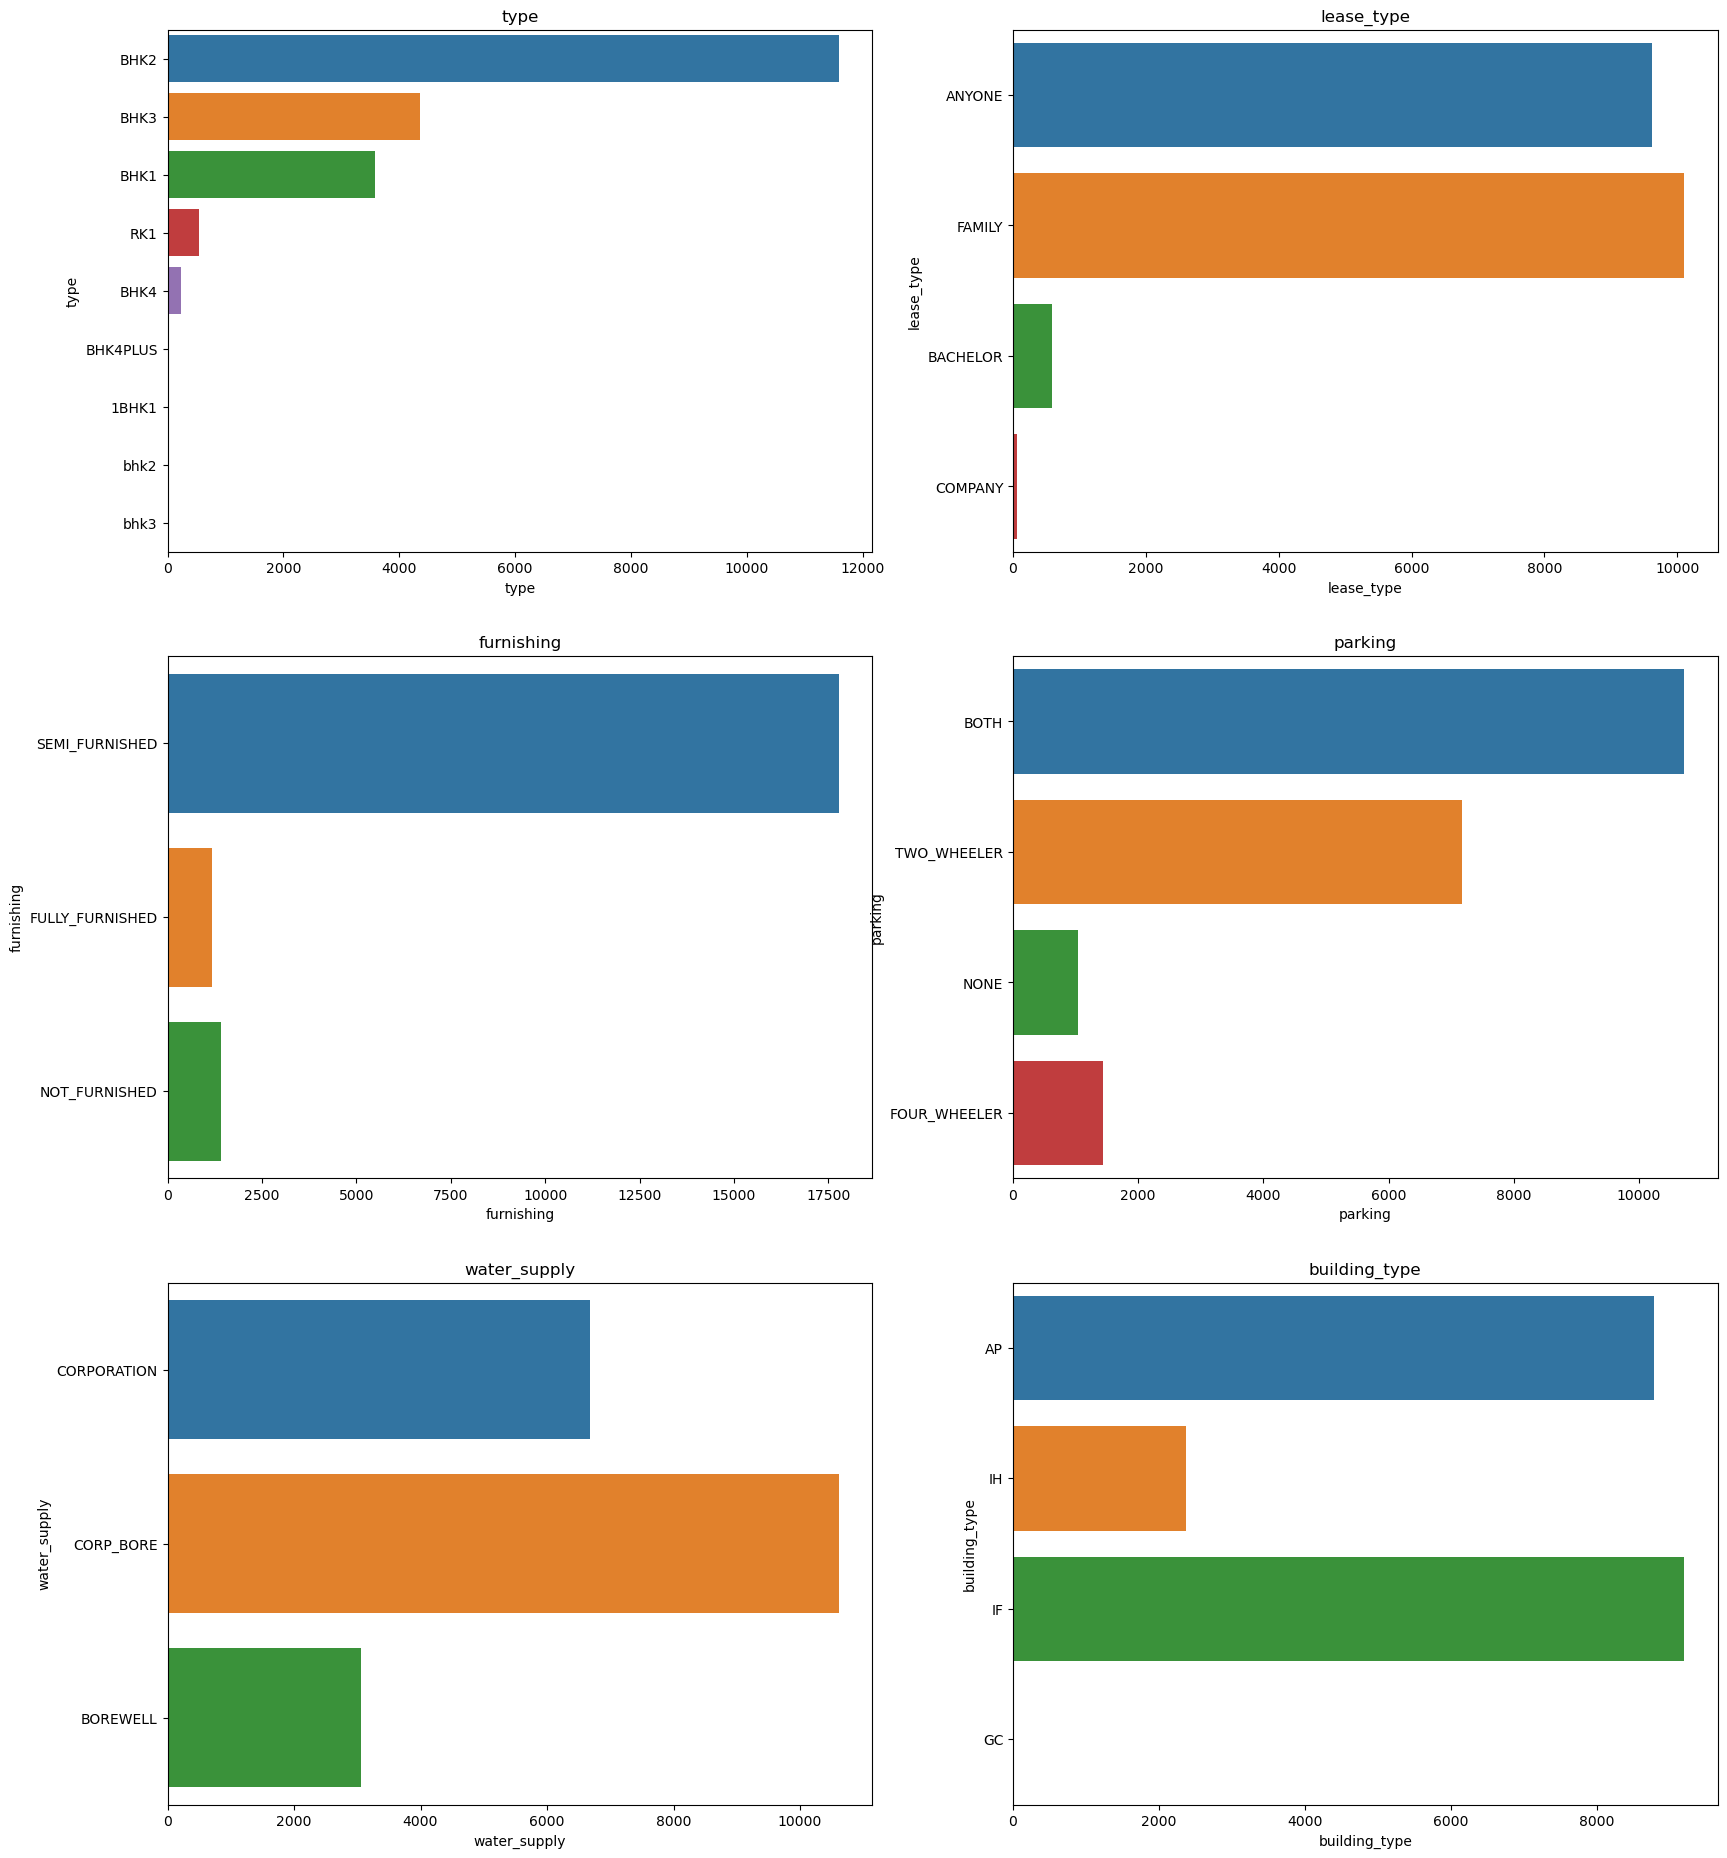

In [21]:
categorical=['type', 'lease_type', 'furnishing', 'parking', 'water_supply', 'building_type']
plt.figure(figsize=(20,80))
plot=1
for i in categorical:
    ax=plt.subplot(10,2,plot)
    sns.countplot(y=i,data=df)
    plt.xlabel(i)
    plt.title(i)
    plot+=1
    plt.show

# Bivariate Analysis(Relationship between Categorical features and Labels)

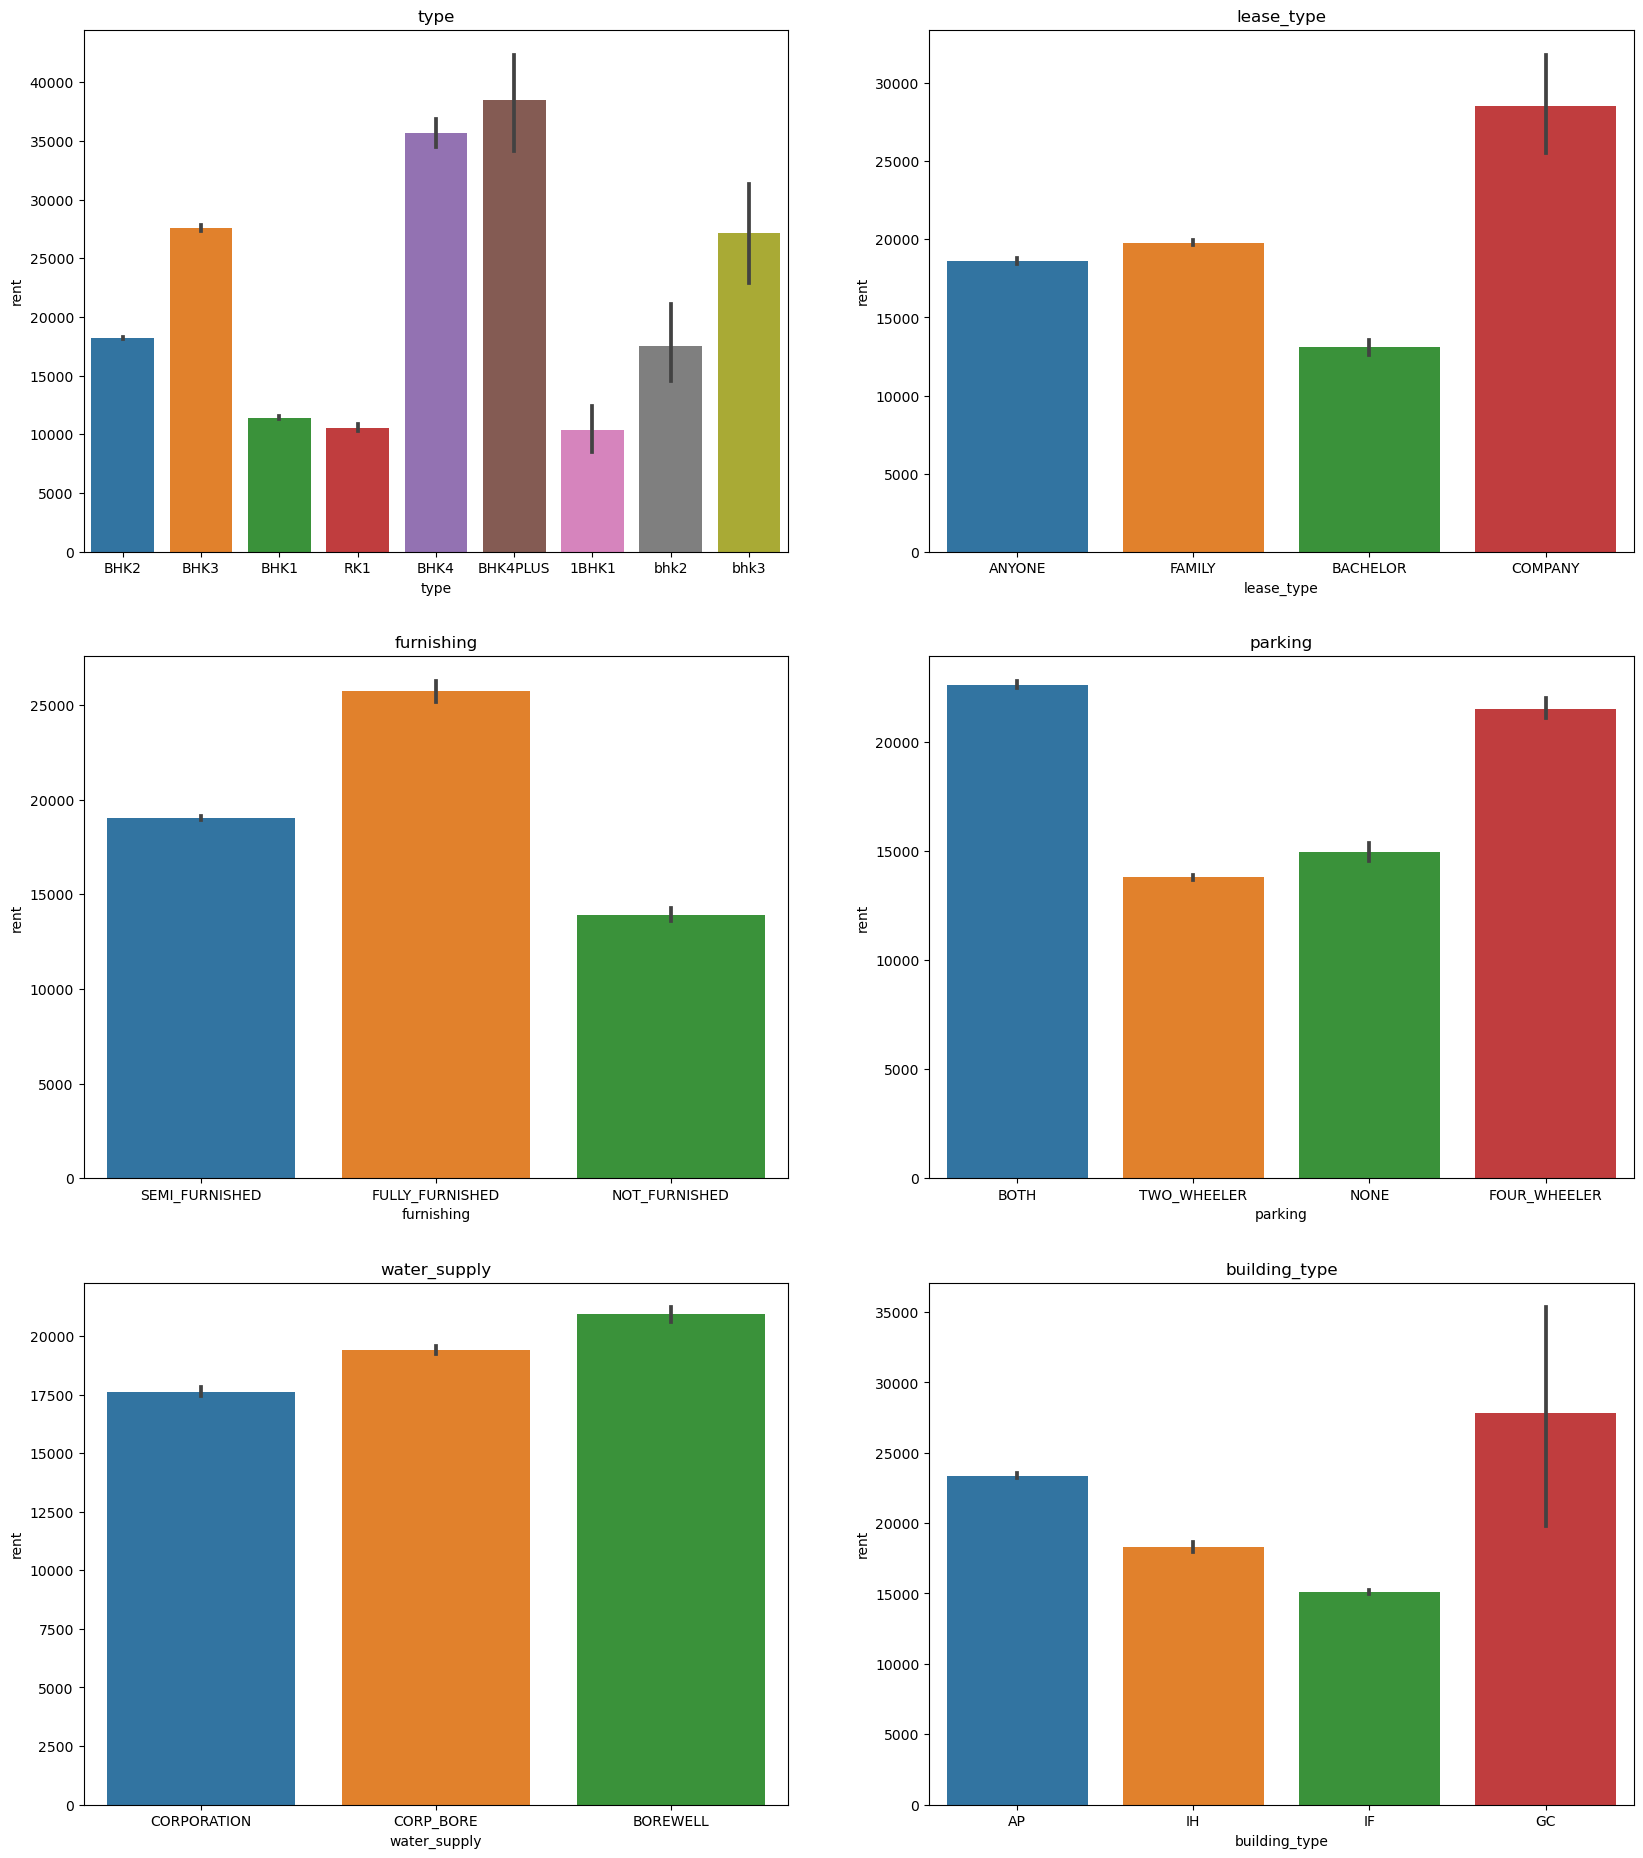

In [22]:
categorical=['type', 'lease_type', 'furnishing', 'parking', 'water_supply', 'building_type']
plt.figure(figsize=(20,80))
plot=1
for i in categorical:
    ax=plt.subplot(10,2,plot)
    sns.barplot(x=i,y='rent',data=df)
    plt.xlabel(i)
    plt.title(i)
    plot+=1
    plt.show

# Explore Numerical Features

In [23]:
Numerical_features=[feature for feature in df.columns if ((df[feature].dtype!='object')&(feature not in ['rent']))]
Numerical_features

['activation_date',
 'gym',
 'lift',
 'swimming_pool',
 'negotiable',
 'property_size',
 'property_age',
 'bathroom',
 'floor',
 'total_floor',
 'balconies']

# Summary of Numerical Features

In [24]:
df.describe()

,activation_date,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,floor,total_floor,balconies,rent
count,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000
mean,2017.637471,0.226359,0.361006,0.174633,0.711401,1061.571253,5.776244,1.857887,1.869382,3.798595,1.147615,19049.434838
std,0.480742,0.418485,0.480304,0.379662,0.453122,591.873599,6.360285,0.710982,2.182070,3.185034,0.993529,8433.565460
min,2017.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,8000.000000
25%,2017.000000,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,2018.000000,0.000000,0.000000,0.000000,1.000000,1045.000000,5.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,2018.000000,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,2.000000,4.000000,2.000000,24000.000000
max,2018.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,25.000000,26.000000,13.000000,50000.000000


# Find Discrete Numerical Features

In [25]:
Discrete_features=[feature for feature in Numerical_features if len(df[feature].unique())<25]
Discrete_features

['activation_date',
 'gym',
 'lift',
 'swimming_pool',
 'negotiable',
 'bathroom',
 'floor',
 'balconies']

# Univariate Analysis(Distribution of Discrete Numerical Features)

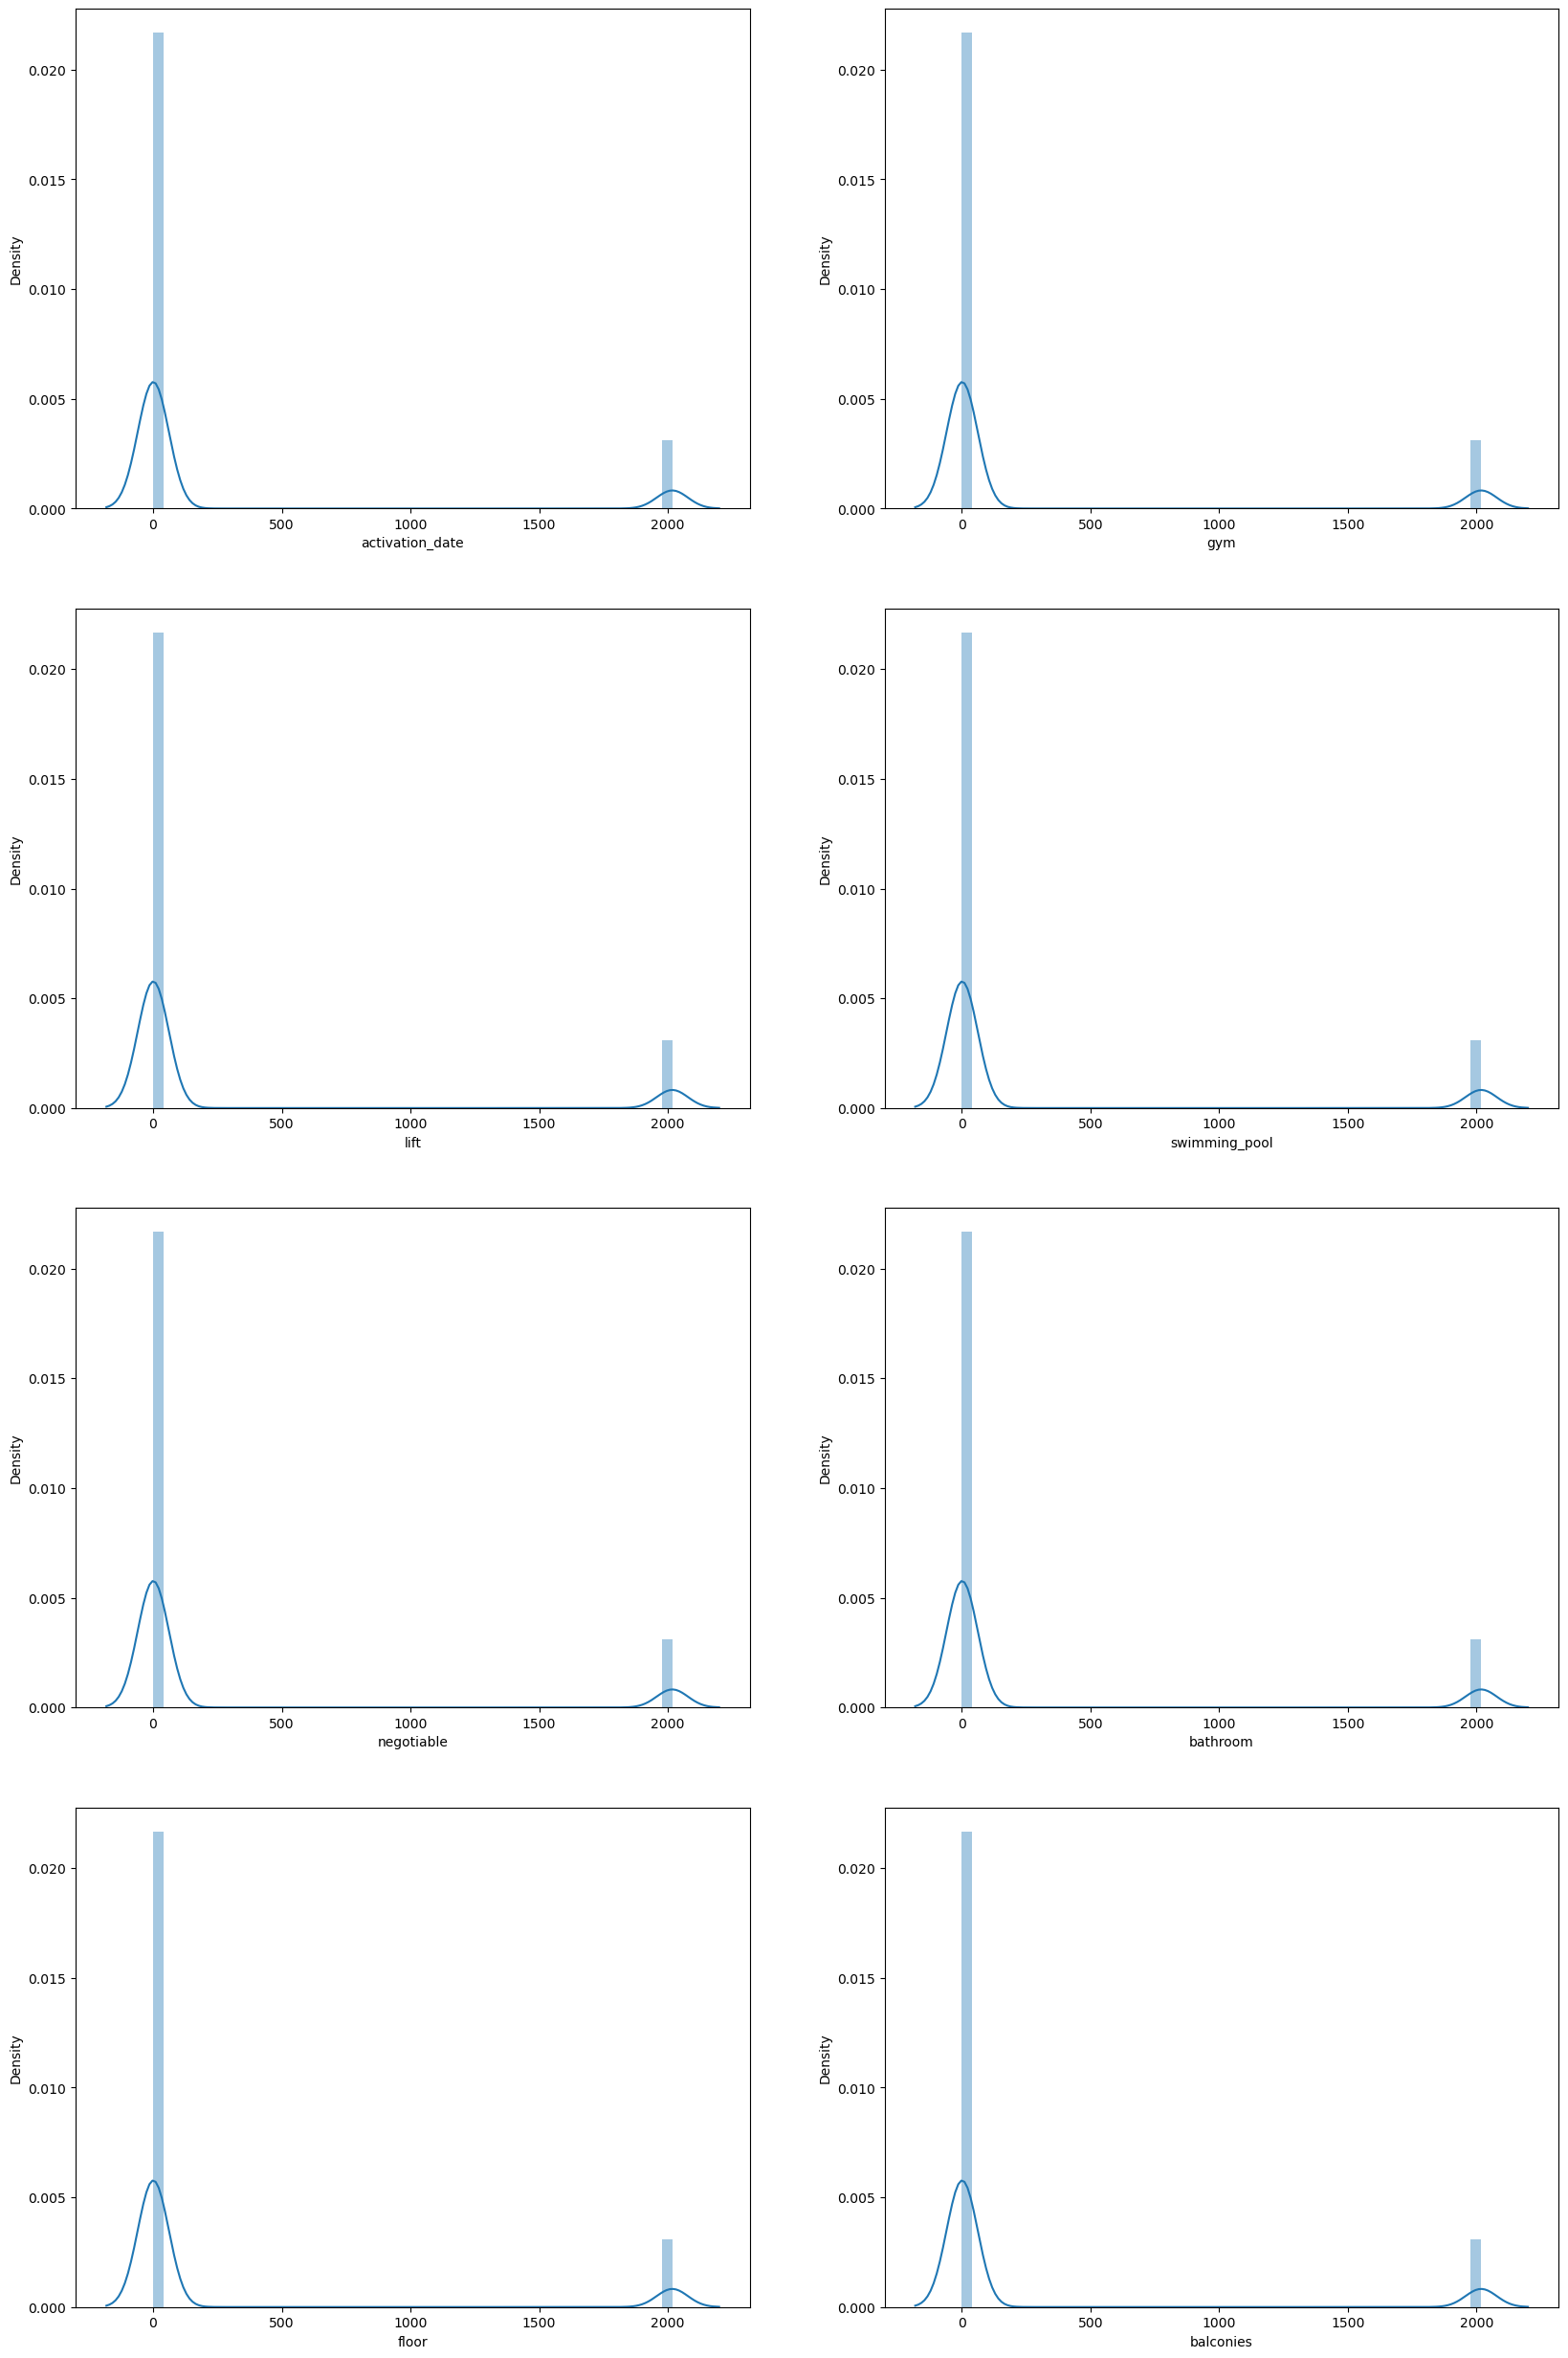

In [26]:
plt.figure(figsize=(20,80))
plot=1
for i in Discrete_features:
    ax=plt.subplot(10,2,plot)
    sns.distplot(df[Discrete_features])
    plt.xlabel(i)
    plot+=1
    plt.show

# Bivariate Analysis(Relationship between Discrete Numerical Features and Labels)

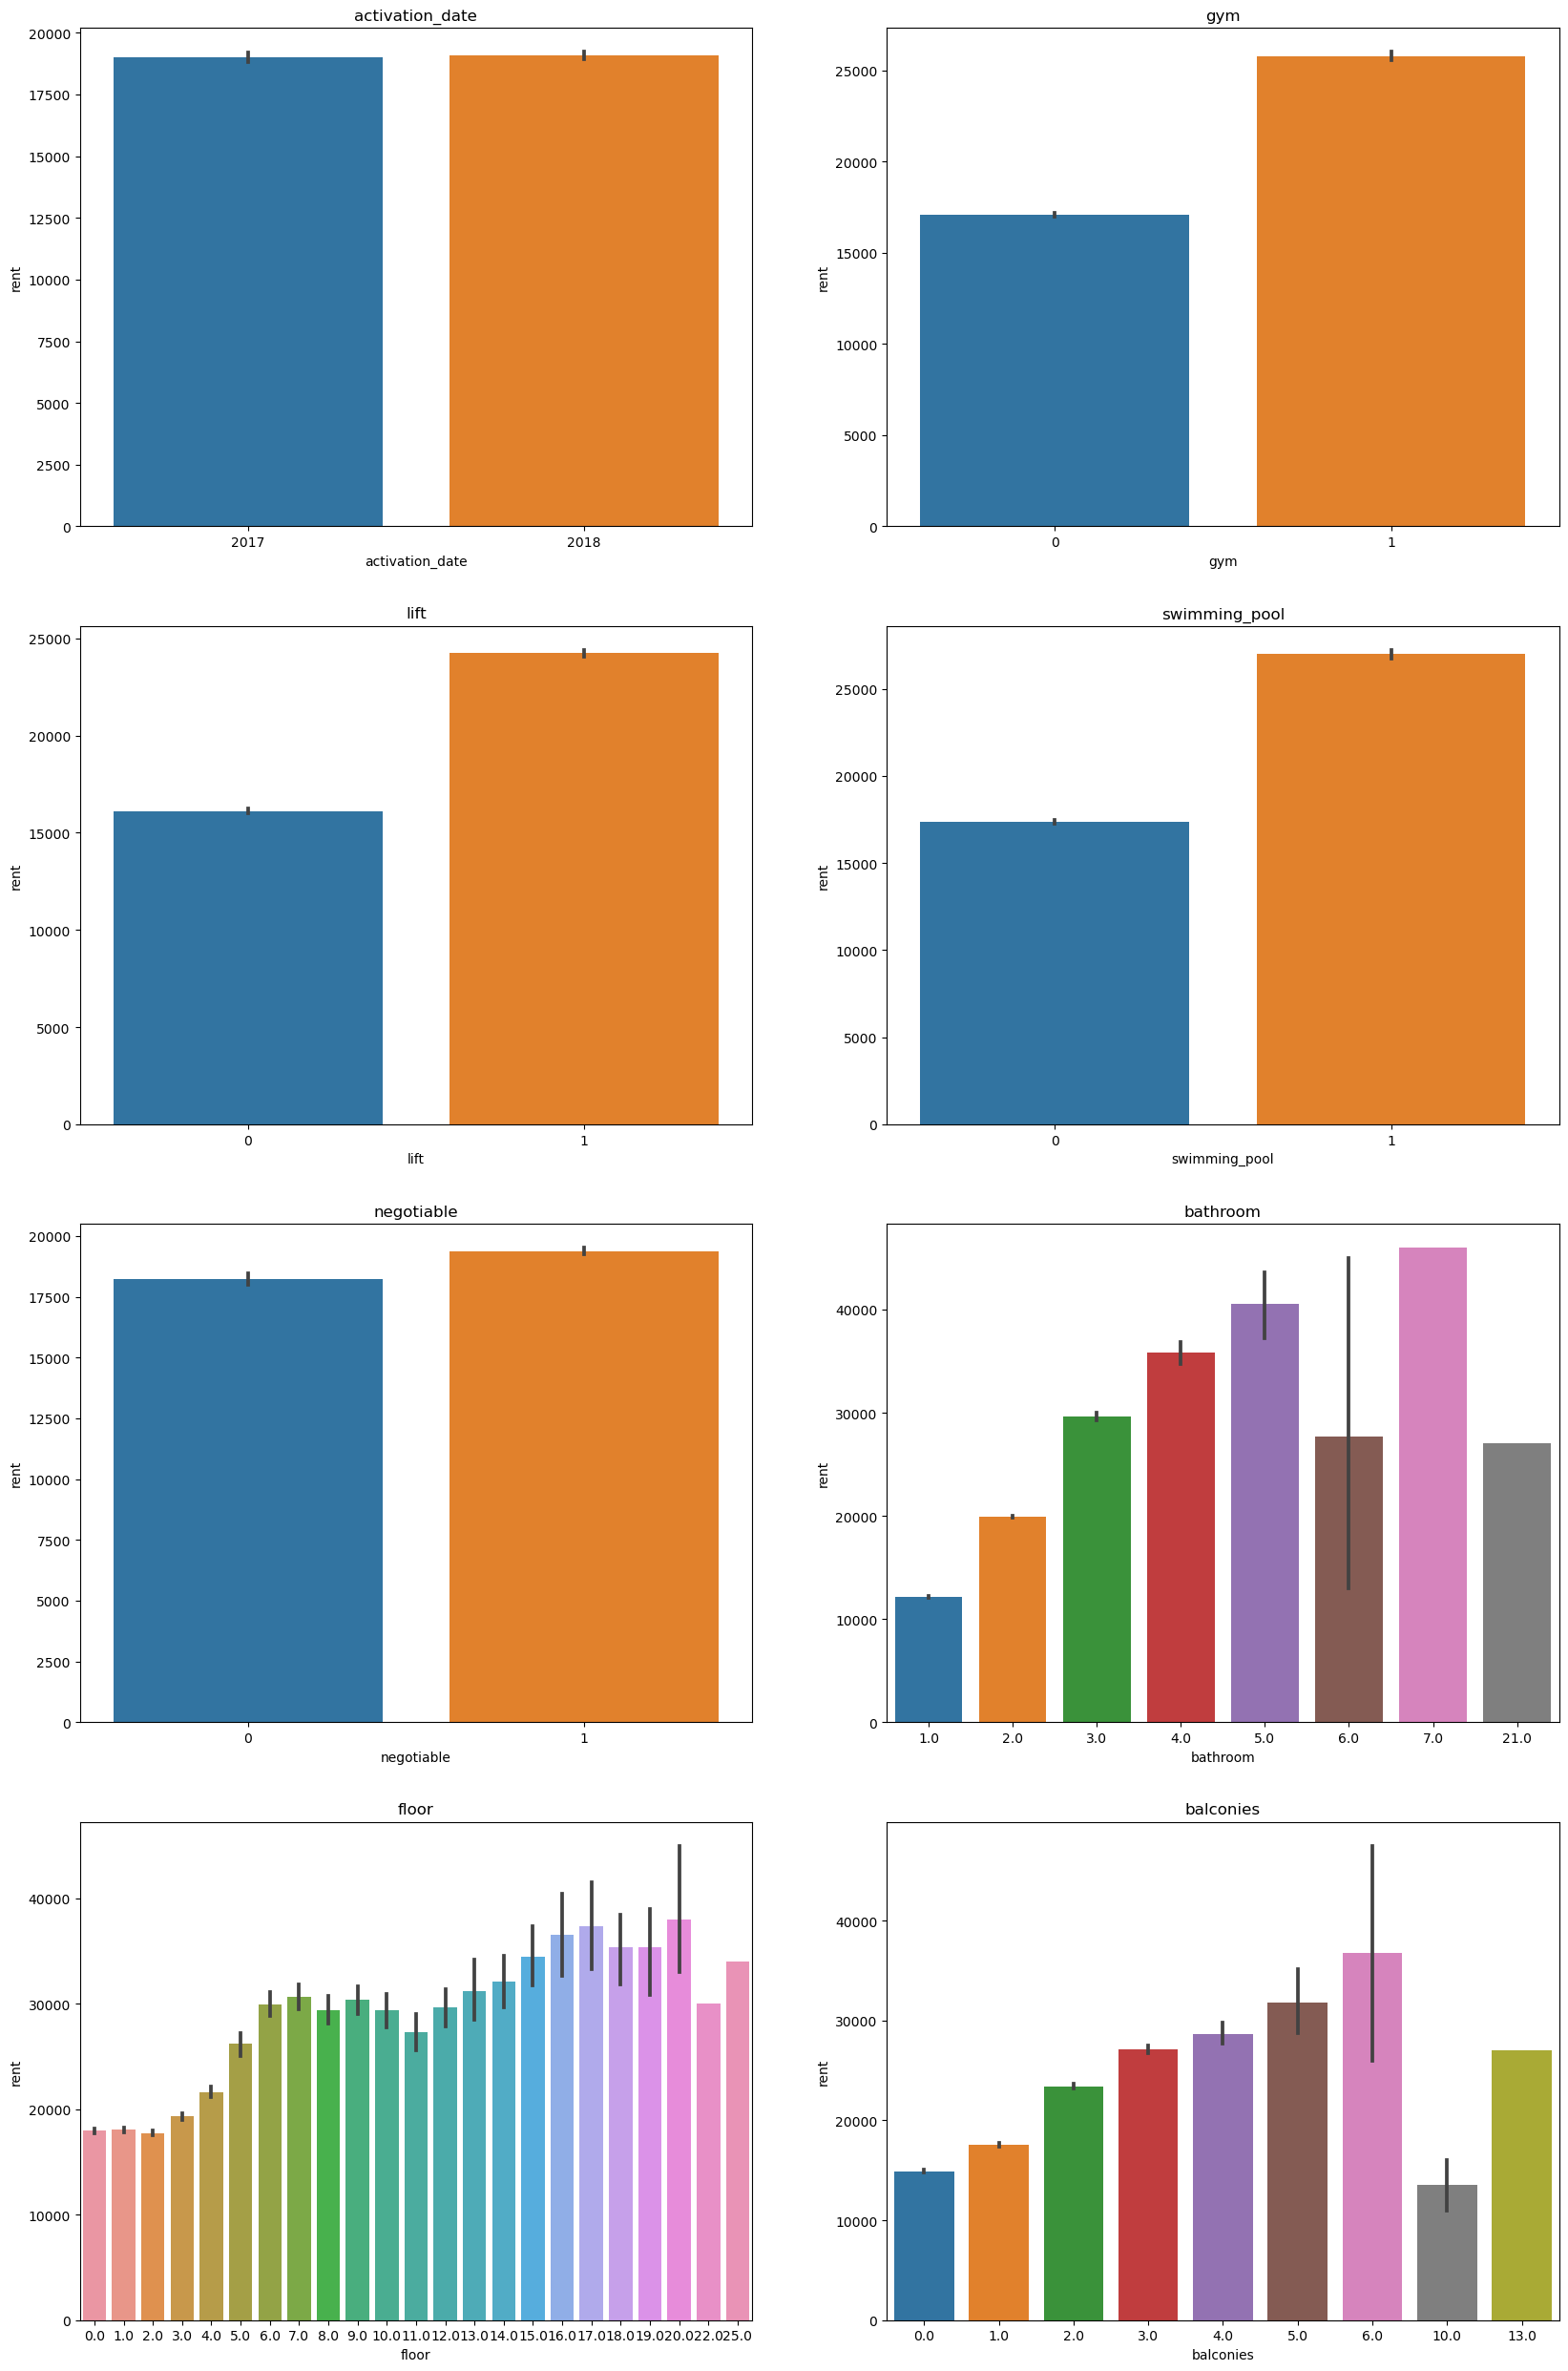

In [27]:
plt.figure(figsize=(20,80))
plot=1
for i in Discrete_features:
    ax=plt.subplot(10,2,plot)
    sns.barplot(x=i,y='rent',data=df)
    plt.xlabel(i)
    plt.title(i)
    plot+=1
    plt.show

# Find Continuous Numerical Features

In [28]:
Continuous_features=[feature for feature in df.columns if ((df[feature].dtype!='object')&(feature not in ['y'])&(feature not in Discrete_features))]
Continuous_features

['property_size', 'property_age', 'total_floor', 'rent']

# Univariate Analysis(Distribution of Continuous Numerical Features)

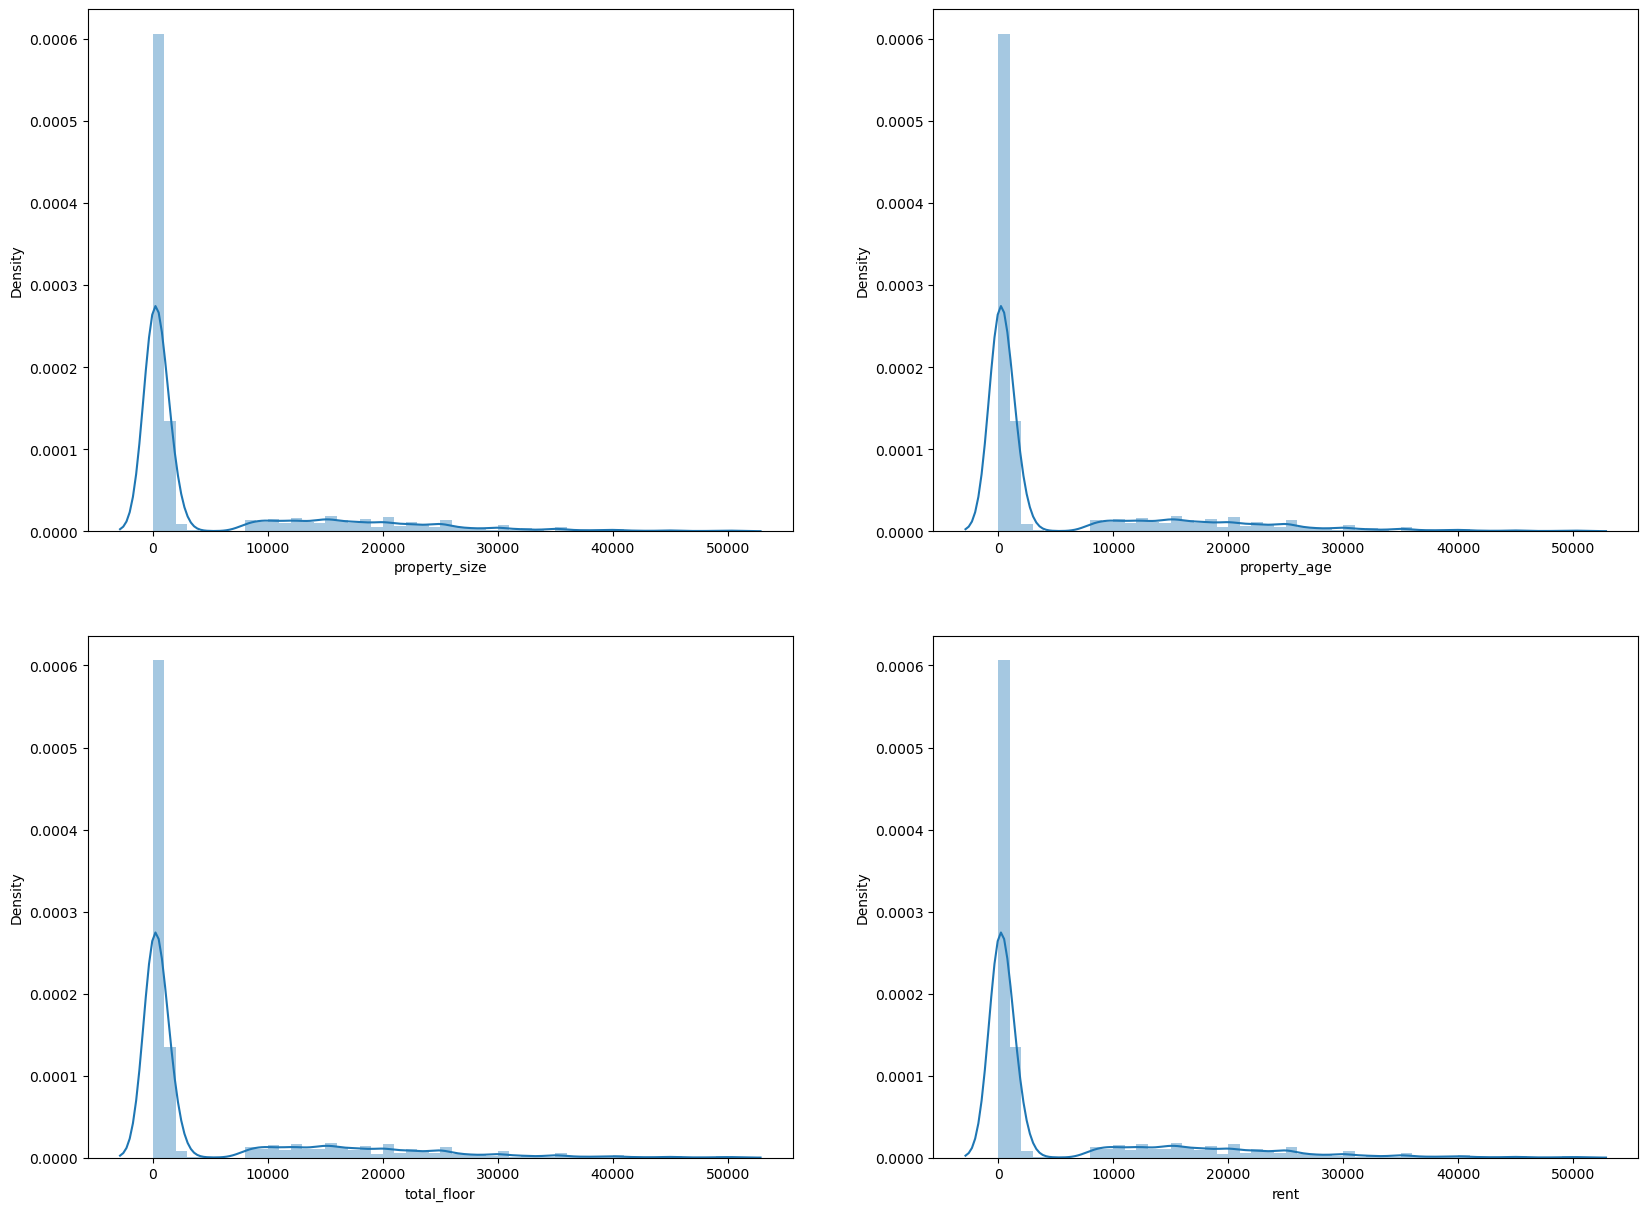

In [29]:
Continuous=['property_size', 'property_age', 'total_floor', 'rent']
plt.figure(figsize=(20,80))
plot=1
for i in Continuous:
    ax=plt.subplot(10,2,plot)
    sns.distplot(df[Continuous])
    plt.xlabel(i)
    plot+=1
    plt.show

# Bivariate Analysis(Relationship between Continuous Numerical Features and Labels)

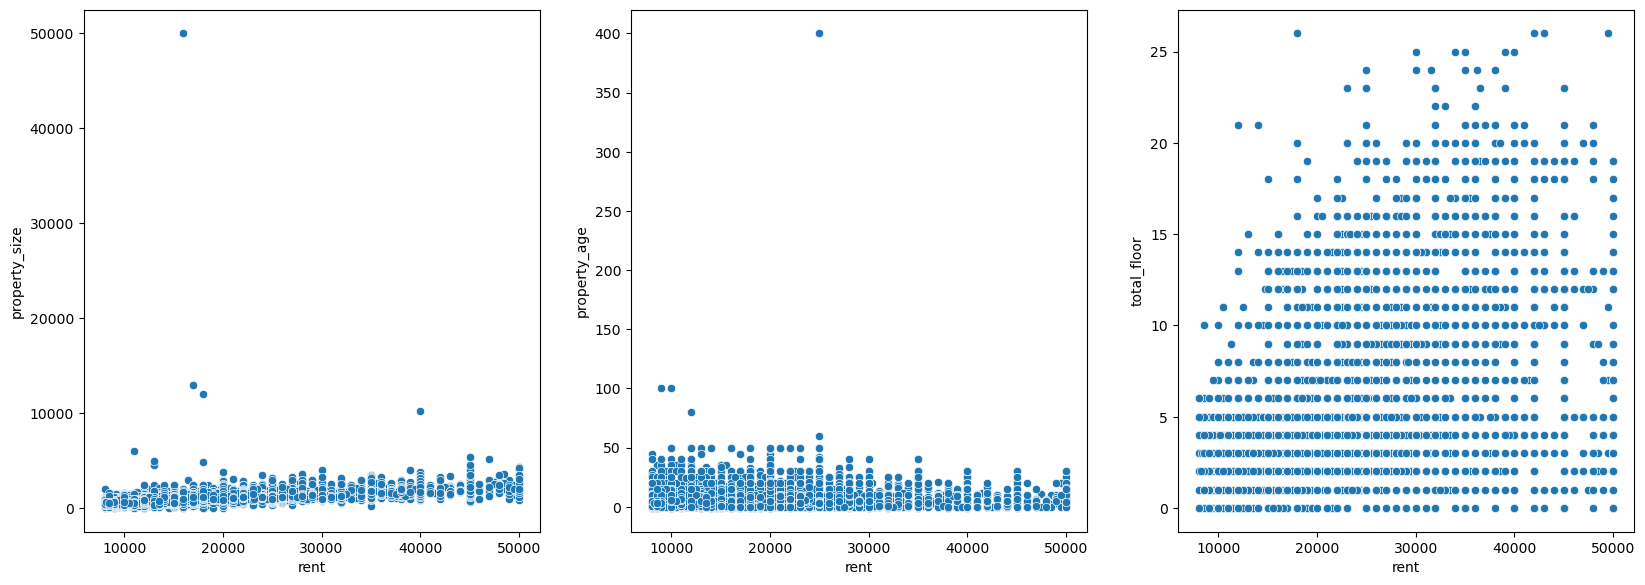

In [29]:
Continuous=['property_size', 'property_age', 'total_floor']
plt.figure(figsize=(20,80))
plot=1
for i in Continuous:
    ax=plt.subplot(10,3,plot)
    sns.scatterplot(x='rent',y=i,data=df)
    plt.xlabel('rent')
    plot+=1
    plt.show

# Handling the Outliers through IQR method

<Axes: >

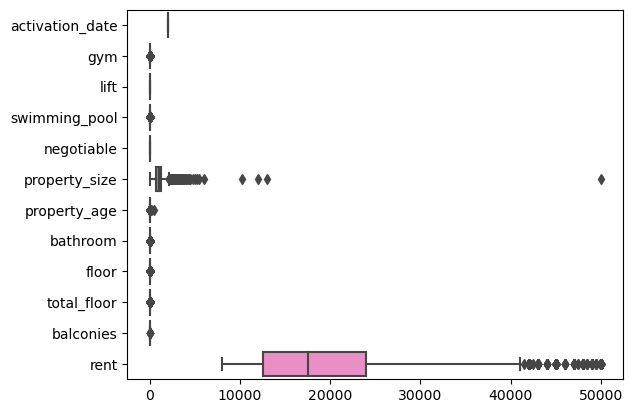

In [19]:
sns.boxplot(df,orient='h')

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:
for i in ["property_size","rent"]:
    lr,ur=remove_outlier(df[i])
    df[i]=np.where(df[i]> ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

<Axes: >

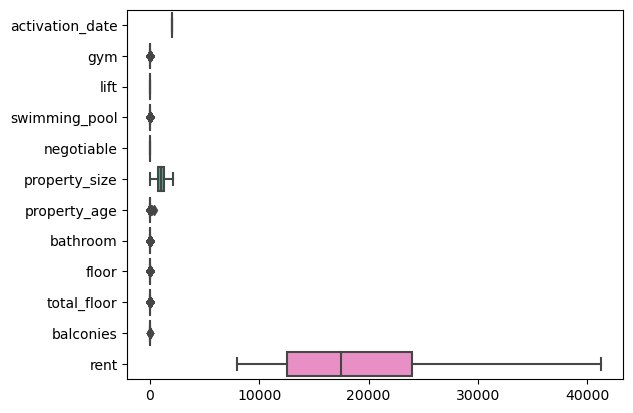

In [22]:
sns.boxplot(df,orient='h')

# pairplot

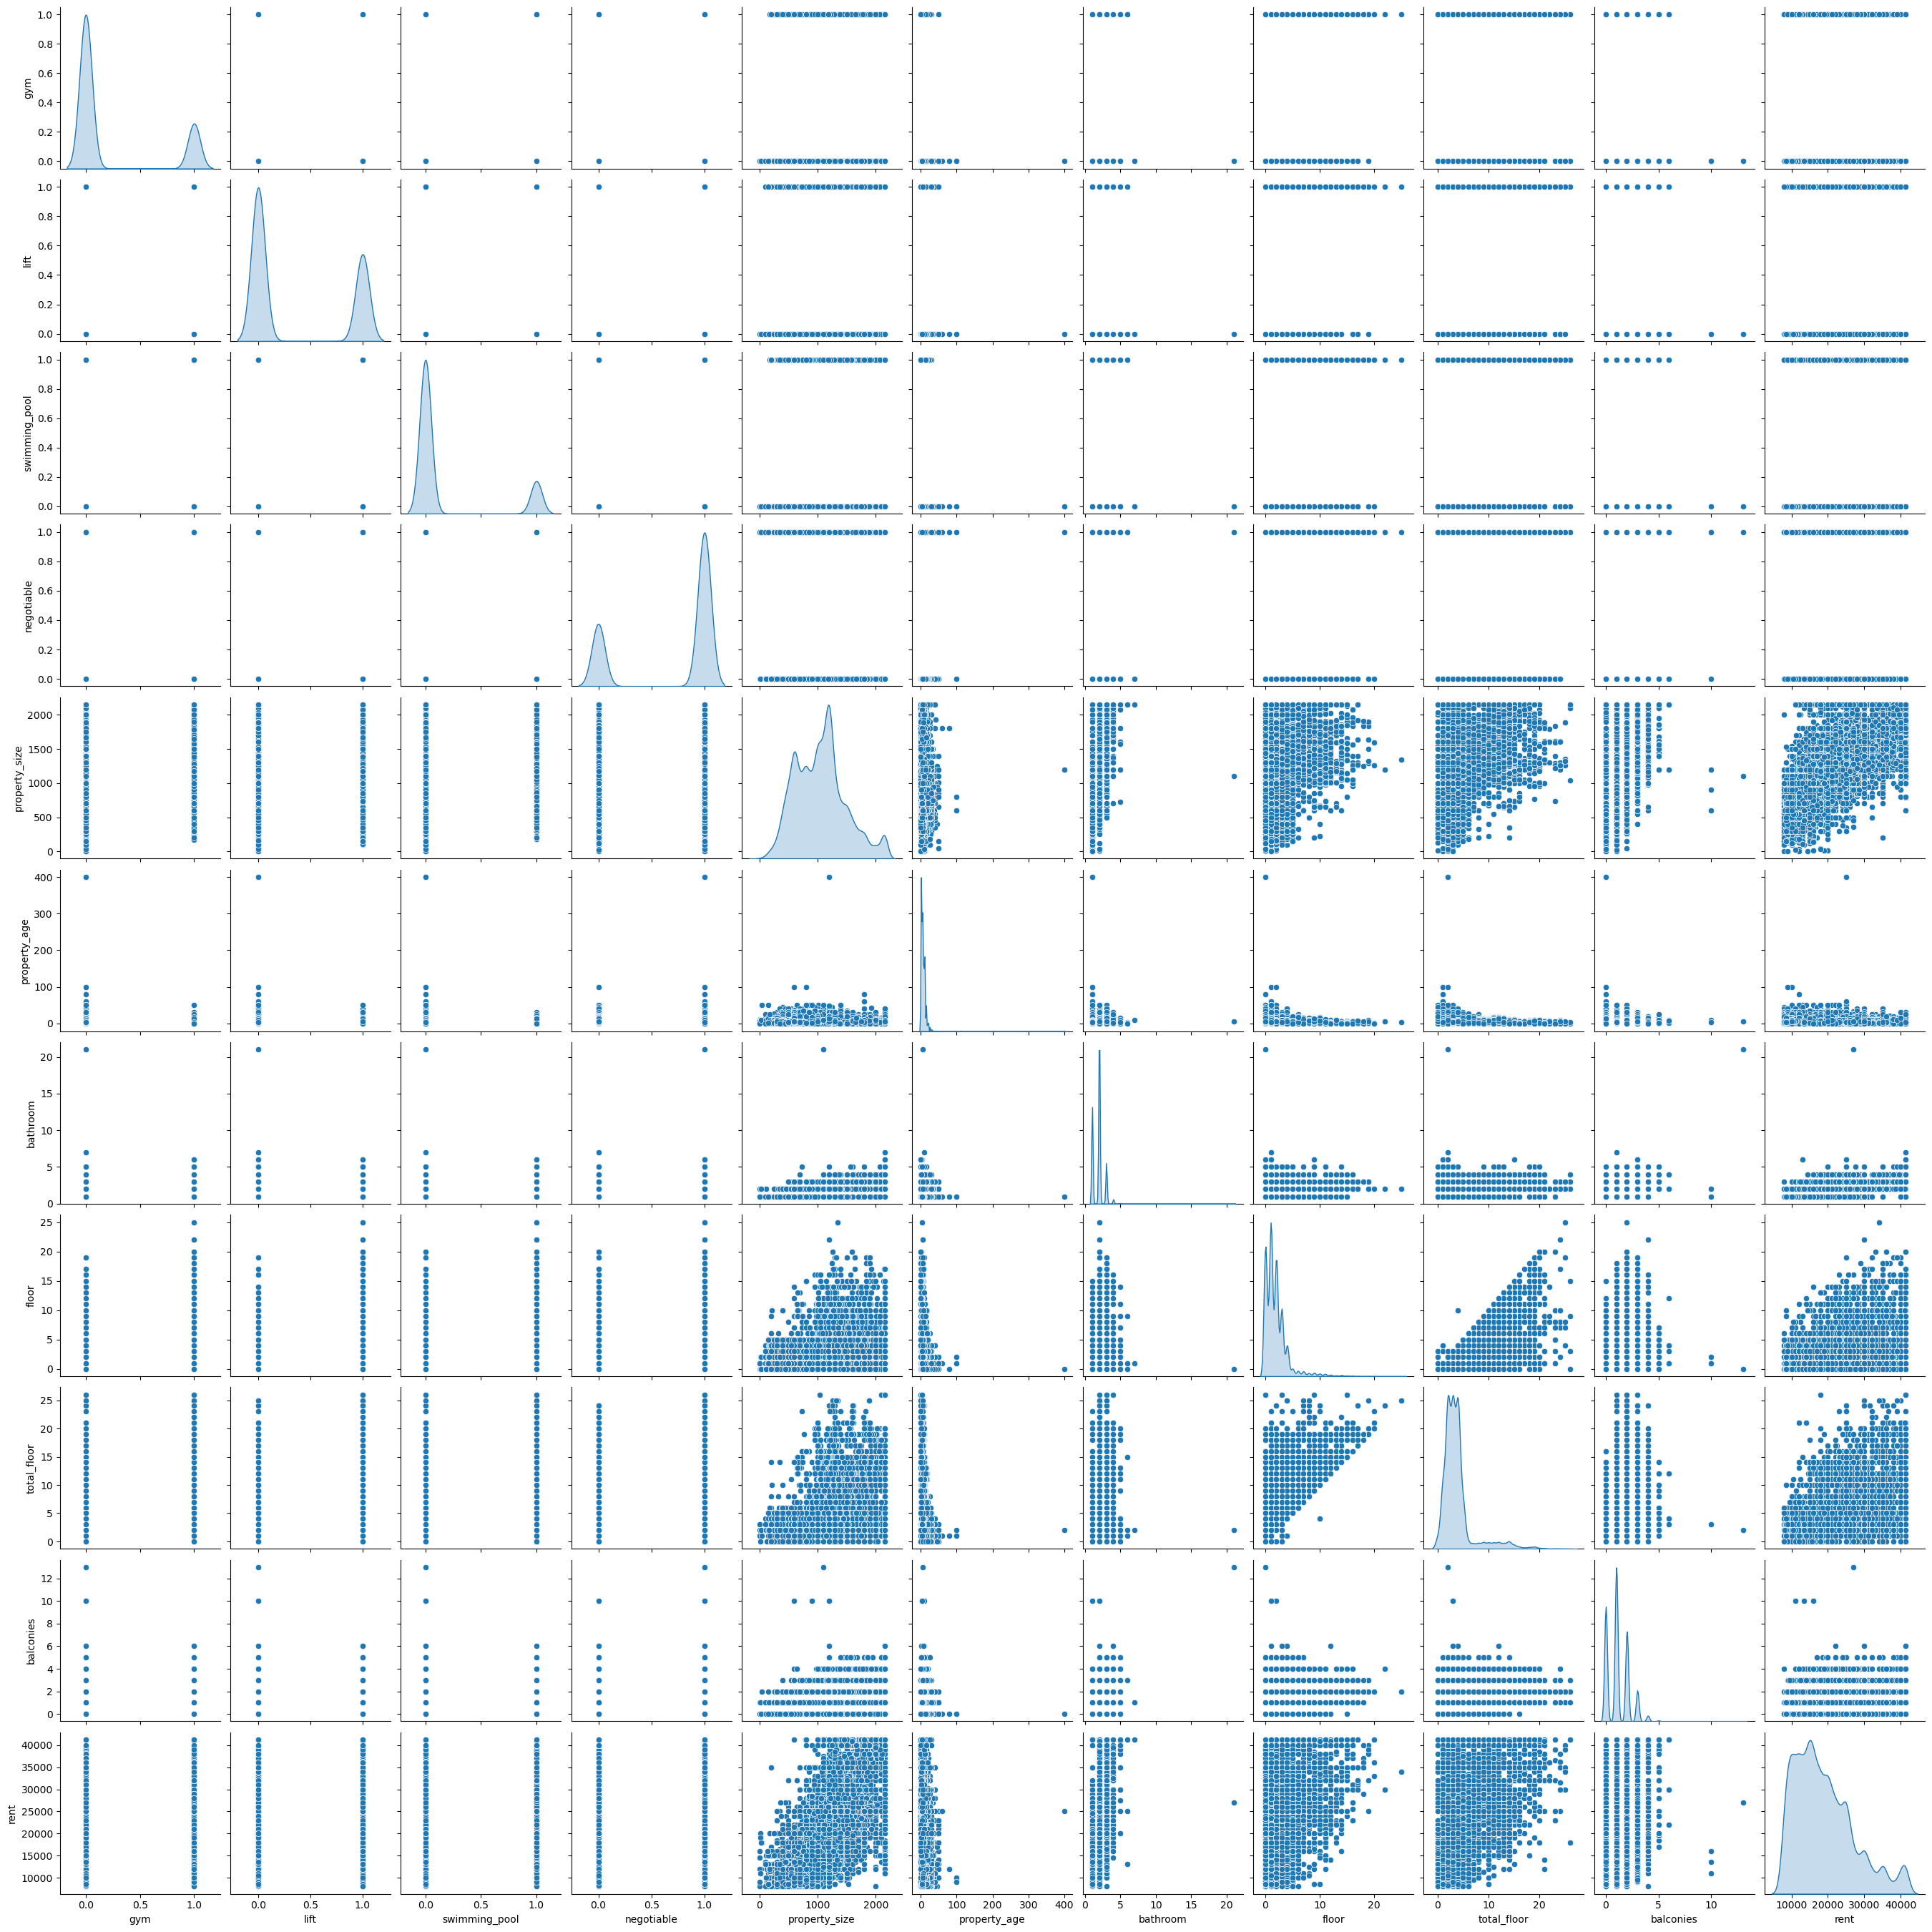

In [38]:
sns.pairplot(df,diag_kind='kde')

# Explore the Correlation between the Numerical Features

In [95]:
df.corr()

,activation_date,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,floor,total_floor,balconies,rent
activation_date,1.000000,0.009165,-0.008250,0.006941,0.002513,-0.024419,-0.010239,-0.023398,-0.003604,-0.000076,0.011046,0.004199
gym,0.009165,1.000000,0.644861,0.769674,0.009291,0.394199,-0.180006,0.326561,0.392713,0.527530,0.415404,0.439112
lift,-0.008250,0.644861,1.000000,0.564556,0.011717,0.432098,-0.181822,0.366174,0.405260,0.531502,0.525662,0.473023
swimming_pool,0.006941,0.769674,0.564556,1.000000,0.009985,0.383880,-0.167889,0.321254,0.434024,0.575172,0.382922,0.440665
negotiable,0.002513,0.009291,0.011717,0.009985,1.000000,0.067448,0.039332,0.059940,-0.012391,-0.001711,0.027961,0.065009
property_size,-0.024419,0.394199,0.432098,0.383880,0.067448,1.000000,-0.009608,0.761071,0.206492,0.316213,0.507682,0.766335
property_age,-0.010239,-0.180006,-0.181822,-0.167889,0.039332,-0.009608,1.000000,-0.047629,-0.192413,-0.231662,-0.108632,-0.012320
bathroom,-0.023398,0.326561,0.366174,0.321254,0.059940,0.761071,-0.047629,1.000000,0.170868,0.265864,0.448919,0.678881
floor,-0.003604,0.392713,0.405260,0.434024,-0.012391,0.206492,-0.192413,0.170868,1.000000,0.709493,0.327447,0.310412
total_floor,-0.000076,0.527530,0.531502,0.575172,-0.001711,0.316213,-0.231662,0.265864,0.709493,1.000000,0.361751,0.442943


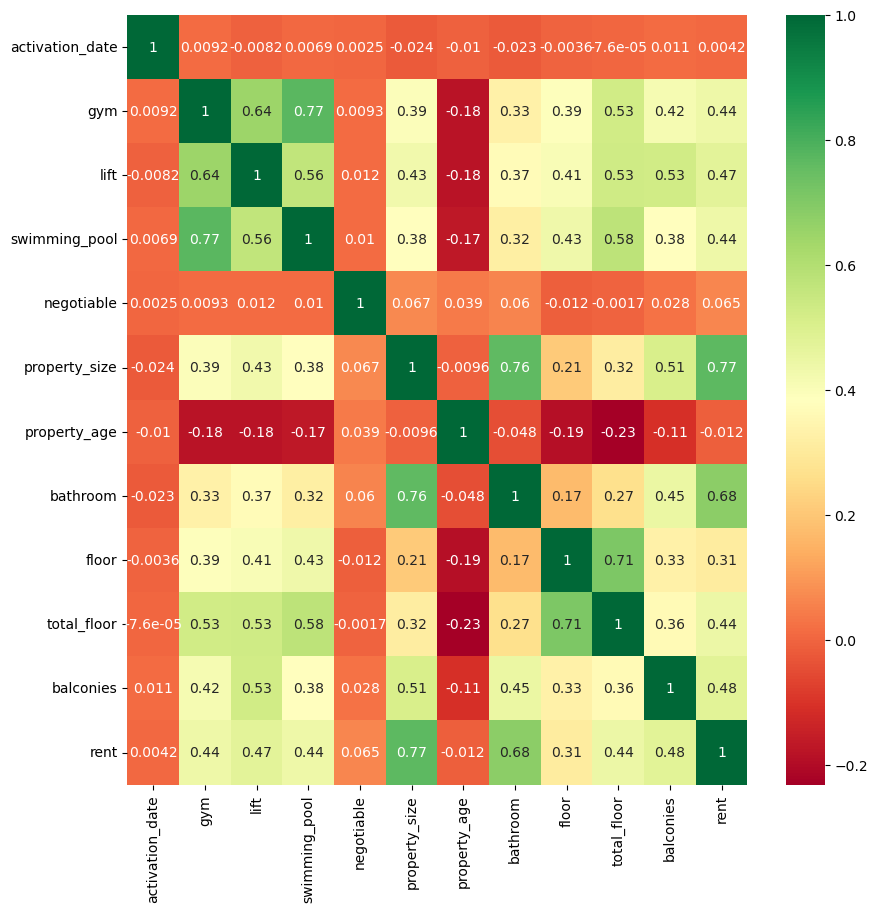

In [96]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
df1=df.copy()

In [24]:
df1.shape

(20357, 19)

In [25]:
location_stats=df1.groupby("locality")["locality"].count().sort_values(ascending=False)
print("Length of Location_stats: ",len(location_stats))
print("Length of less than 10: ",len((location_stats[location_stats<=10])))
print("Length of greater than 10: ",len((location_stats[location_stats>10])))


Length of Location_stats:  1917
Length of less than 10:  1691
Length of greater than 10:  226


In [26]:
location_lesser10=location_stats[location_stats<=10]
location_lesser10

locality
Bhuvaneshwari Nagar                                          10
Jagadenahalli                                                10
LBS Nagar                                                    10
Cholourpalya                                                 10
B Narayanapura,Mahadevapura                                  10
                                                             ..
Hoodi , Saketha Nagar, Hoodi, Bengaluru, Karnataka, India     1
Hoodi ,                                                       1
Hemanth Nagar                                                 1
Heggondahalli, Gunjur Post                                    1
wilson garden                                                 1
Name: locality, Length: 1691, dtype: int64

In [27]:
location_greater10=location_stats[location_stats>10]
location_greater10

locality
Whitefield                               900
HSR Layout                               682
Banashankari                             644
Marathahalli                             473
Mahadevapura                             432
                                        ... 
BTM Layout 1st Stage                      11
Jagadish Nagar                            11
Tyagaraja Nagar                           11
RR Nagar, Bengaluru, Karnataka, India     11
Doddanekkundi,Doddanekkundi               11
Name: locality, Length: 226, dtype: int64

In [28]:
df1["locality"]=df["locality"].apply(lambda x: 'other' if x in location_lesser10 else x)
len(df1["locality"].unique())

227

In [29]:
df1

,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,rent
1,BHK2,Bellandur,2017,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400.0,4.0,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0
2,BHK3,other,2018,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350.0,6.0,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,2018,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600.0,3.0,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,2018,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500.0,15.0,3.0,0.0,0.0,CORPORATION,IH,1.0,41250.0
5,BHK1,"Seetharampalya,Hoodi",2017,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080.0,0.0,2.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20492,BHK1,Ulsoor,2017,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850.0,30.0,2.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0
20496,BHK2,Koramangala 4th Block,2017,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000.0,10.0,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0
20497,BHK2,Kumaraswamy Layout,2017,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000.0,0.0,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0
20498,BHK2,Indiranagar,2018,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000.0,5.0,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0


In [30]:
df1["type"].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [31]:
df1["type"]=df1["type"].map({"BHK1":0,"1BHK1":0,"BHK2":1,"bhk2":1,"BHK3":2,"bhk3":2,"BHK4":3,"BHK4PLUS":4,"RK1":5})

In [32]:
df1["lease_type"].unique()

array(['ANYONE', 'FAMILY', 'BACHELOR', 'COMPANY'], dtype=object)

In [33]:
df1["lease_type"]=df1["lease_type"].map({"ANYONE":0,"BACHELOR":1,"FAMILY":2,"COMPANY":3})

In [34]:
df1["furnishing"].unique()

array(['SEMI_FURNISHED', 'FULLY_FURNISHED', 'NOT_FURNISHED'], dtype=object)

In [35]:
df1["furnishing"]=df1["furnishing"].map({"NOT_FURNISHED":0,"SEMI_FURNISHED":1,"FULLY_FURNISHED":2})

In [36]:
df1["parking"].unique()

array(['BOTH', 'TWO_WHEELER', 'NONE', 'FOUR_WHEELER'], dtype=object)

In [37]:
df1["parking"]=df1["parking"].map({"NONE":0,"TWO_WHEELER":1,"FOUR_WHEELER":2,"BOTH":3})

In [38]:
df1["water_supply"].unique()

array(['CORPORATION', 'CORP_BORE', 'BOREWELL'], dtype=object)

In [39]:
df1["water_supply"]=df1["water_supply"].map({"CORPORATION":0,"BOREWELL":1,"CORP_BORE":2})

In [40]:
df1["building_type"].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [41]:
df1["building_type"]=df1["building_type"].map({"IF":0,"IH":1,"AP":2,"GC":3})

In [42]:
df1

,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,rent
1,1,Bellandur,2017,0,0,1,0,1,1,3,1400.0,4.0,2.0,3.0,4.0,0,2,2.0,22000.0
2,2,other,2018,2,0,1,0,0,1,3,1350.0,6.0,3.0,1.0,5.0,2,2,3.0,28000.0
3,0,Attiguppe,2018,2,0,0,0,1,1,1,600.0,3.0,1.0,1.0,2.0,0,1,0.0,8000.0
4,2,Kodihalli,2018,2,0,0,0,1,1,3,1500.0,15.0,3.0,0.0,0.0,0,1,1.0,41250.0
5,0,"Seetharampalya,Hoodi",2017,2,1,1,1,1,1,3,1080.0,0.0,2.0,3.0,5.0,2,2,2.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20492,0,Ulsoor,2017,0,0,1,0,1,1,1,850.0,30.0,2.0,1.0,4.0,2,2,1.0,20000.0
20496,1,Koramangala 4th Block,2017,0,0,0,0,1,1,3,1000.0,10.0,2.0,1.0,2.0,0,1,2.0,30000.0
20497,1,Kumaraswamy Layout,2017,2,1,1,0,1,1,3,1000.0,0.0,2.0,5.0,5.0,1,2,2.0,16000.0
20498,1,Indiranagar,2018,2,0,1,0,0,1,3,1000.0,5.0,2.0,2.0,4.0,2,2,3.0,30000.0


In [43]:
df2=pd.get_dummies(df1["locality"],drop_first=True)

In [44]:
df2

,AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",Annapurneshwari Nagar,Ashok Nagar,Attiguppe,B Narayanapura,BTM 1st Stage,BTM 2nd Stage,BTM Layout,BTM Layout 1,BTM Layout 1st Stage,BTM Layout 2nd Stage,Balagere,Banashankari,Banashankari 3rd Stage,Banashankari Stage I,Banashankari Stage II,Bapuji Nagar,Basavanagara,Basavanagudi,Basaveshwar Nagar,Basaveshwara Nagar,Basaweshwara Nagar,Bellandur,Bennigana Halli,Benson Town,"Bharath Housing Society Layout,Banashankari",Bhoganhalli,Bilekahalli,Bommanahalli,Brookefield,C V Raman Nagar,CV Raman Nagar,Carmelaram,Chamrajpet,Chandra Layout,Channasandra,Chansandra,Chickpet,Chikkabellandur,Chikkakannalli,Chikkalasandra,Chinnapanna Halli,Cox Town,Deepanjali Nagar,"Devarabisanahalli,Bellandur","Devasthanagalu,Varthur","Dodda Nekkundi Extension,Doddanekkundi",Doddakannalli,Doddakannelli,Doddanekkundi,"Doddanekkundi,Doddanekkundi",Doddanekundi,"Dodsworth Layout,Whitefield",Domlur,Dooravani Nagar,"EPIP Zone,Brookefield","Eastwood Township,Harlur",Ejipura,Frazer Town,GM Palya,Girinagar,"Green Glen Layout,Bellandur",Gunjur,Gunjur Palya,Gunjur Village,Guttahalli,HAL 2nd Stage,HAL 3rd Stage,HSR Layout,HSR Layout 5th Sector,"HSR Layout, Bengaluru, Karnataka, India",HSR layout Sector 2,Halanayakanahalli,Halasuru,Hanumanthnagar,Harlur,Hongasandra,Hoodi,Hosakerehalli,ITPL,"Immadihalli,Whitefield",Indira Nagar,Indiranagar,Ittamadu,J P Nagar,J P Nagar Phase 5,"J P Nagar Phase 5,JP Nagar",J. P. Nagar,JP Nagar,JP Nagar 1st Phase,JP Nagar 4th Phase,JP Nagar 5th Phase,JP Nagar 6th Phase,JP Nagar Phase 6,"JP Nagar Phase 6,JP Nagar",Jagadish Nagar,Jakkasandra,"Janatha Colony,Chikkabellandur",Jaya Nagar,Jayanagar,Jayanagara,Jayanagara 9th Block,Jeevan Bima Nagar,Jogupalya,Kadubeesanahalli,"Kadubeesanahalli,",Kadugodi,Kaggadasapura,Kaikondrahalli,Kamaksipalya,"Kariyammana Agrahara,Bellandur",Kasavanahalli,Kasavanahalli Off Sarjapur Road,Kempapura Agrahara,Kempegowda Nagar,Kodihalli,Koramangala,Koramangala 1st Block,Koramangala 4th Block,Koramangala 8th Block,Kormangala,Krishnarajapura,Kumaraswamy Layout,Kundalahalli,"Kundalahalli Colony,Brookefield","Kundalahalli,Brookefield","Kundalahalli,Whitefield",Lakkasandra,Madiwala,Mahadevapura,"Maithri Layout,Kadugodi",Mallathahalli,Malleshpalya,Malleshwaram,Malleshwaram West,Mangammanapalya,Marathahalli,Maruthi Nagar,Maruthi Sevanagar,Mavalli,Mullur,Munnekollal,"Munnireddy Layout,Panathur",Murgesh Pallya,Murugeshpalya,Nagarabhavi,Nagarbhavi,Nagavarapalya,Nagondanahalli,"Nallurhalli,Whitefield","Narayanappa Garden,Whitefield",Nayanda Halli,Neelasandra,New Thippasandra,New Tippasandra,Padmanabhanagar,Pai Layout,Panathur,"Pattandur Agrahara,Whitefield",Pulikeshi Nagar,RR Nagar,"RR Nagar, Bengaluru, Karnataka, India","Rainbow Drive,Halanayakanahalli",Raja Rajeshwari Nagar,Rajaji Nagar,Rajajinagar,Rajarajeshwari Nagar,Rajarajeshwarinagar,Ramagondanahalli,Richmond Town,Roopena Agrahara,"Roopena Agrahara,Bommanahalli",Rustam Bagh Layout,Sadanandanagar,Sadduguntepalya,Samethanahalli,Sarjapur Road Post Railway Crossing,Sarjapur Road Till Wipro,Sarjapur Road Wipro To Railway Crossing,"Seetharampalya,Hoodi",Seshadripuram,Shankarapura,Shanti Nagar,Sheshadripuram,Shivaji Nagar,"Silver Springs Layout,Munnekollal",Sorahunase,Srinagar,Srinivasnagar,Srinivaspura,Srirampura,"Stage 2,BTM 2nd Stage","Stage 2,BTM Layout",Subramanyapura,Suddagunte Palya,Sudhama Nagar,Sunkadakatte,"Thigalarapalya,Hoodi",Thirumalashettyhally,Thubarahalli,"Thubarahalli,Whitefield",Thyagaraja Nagar,Tyagaraja Nagar,Udaya Nagar,Ulsoor,Uttarahalli,Uttarahalli Hobli,Varthur,Vasanth Nagar,Vibhutipura,Victoria Layout,Vignan Nagar,Vijaya Nagar,Vijayanagar,Vimanapura,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,other
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [45]:
df3=pd.concat([df1,df2],axis=1)

In [46]:
df3.drop("locality",axis=1,inplace=True)

In [47]:
df3

,type,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,rent,AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",Annapurneshwari Nagar,Ashok Nagar,Attiguppe,B Narayanapura,BTM 1st Stage,BTM 2nd Stage,BTM Layout,BTM Layout 1,BTM Layout 1st Stage,BTM Layout 2nd Stage,Balagere,Banashankari,Banashankari 3rd Stage,Banashankari Stage I,Banashankari Stage II,Bapuji Nagar,Basavanagara,Basavanagudi,Basaveshwar Nagar,Basaveshwara Nagar,Basaweshwara Nagar,Bellandur,Bennigana Halli,Benson Town,"Bharath Housing Society Layout,Banashankari",Bhoganhalli,Bilekahalli,Bommanahalli,Brookefield,C V Raman Nagar,CV Raman Nagar,Carmelaram,Chamrajpet,Chandra Layout,Channasandra,Chansandra,Chickpet,Chikkabellandur,Chikkakannalli,Chikkalasandra,Chinnapanna Halli,Cox Town,Deepanjali Nagar,"Devarabisanahalli,Bellandur","Devasthanagalu,Varthur","Dodda Nekkundi Extension,Doddanekkundi",Doddakannalli,Doddakannelli,Doddanekkundi,"Doddanekkundi,Doddanekkundi",Doddanekundi,"Dodsworth Layout,Whitefield",Domlur,Dooravani Nagar,"EPIP Zone,Brookefield","Eastwood Township,Harlur",Ejipura,Frazer Town,GM Palya,Girinagar,"Green Glen Layout,Bellandur",Gunjur,Gunjur Palya,Gunjur Village,Guttahalli,HAL 2nd Stage,HAL 3rd Stage,HSR Layout,HSR Layout 5th Sector,"HSR Layout, Bengaluru, Karnataka, India",HSR layout Sector 2,Halanayakanahalli,Halasuru,Hanumanthnagar,Harlur,Hongasandra,Hoodi,Hosakerehalli,ITPL,"Immadihalli,Whitefield",Indira Nagar,Indiranagar,Ittamadu,J P Nagar,J P Nagar Phase 5,"J P Nagar Phase 5,JP Nagar",J. P. Nagar,JP Nagar,JP Nagar 1st Phase,JP Nagar 4th Phase,JP Nagar 5th Phase,JP Nagar 6th Phase,JP Nagar Phase 6,"JP Nagar Phase 6,JP Nagar",Jagadish Nagar,Jakkasandra,"Janatha Colony,Chikkabellandur",Jaya Nagar,Jayanagar,Jayanagara,Jayanagara 9th Block,Jeevan Bima Nagar,Jogupalya,Kadubeesanahalli,"Kadubeesanahalli,",Kadugodi,Kaggadasapura,Kaikondrahalli,Kamaksipalya,"Kariyammana Agrahara,Bellandur",Kasavanahalli,Kasavanahalli Off Sarjapur Road,Kempapura Agrahara,Kempegowda Nagar,Kodihalli,Koramangala,Koramangala 1st Block,Koramangala 4th Block,Koramangala 8th Block,Kormangala,Krishnarajapura,Kumaraswamy Layout,Kundalahalli,"Kundalahalli Colony,Brookefield","Kundalahalli,Brookefield","Kundalahalli,Whitefield",Lakkasandra,Madiwala,Mahadevapura,"Maithri Layout,Kadugodi",Mallathahalli,Malleshpalya,Malleshwaram,Malleshwaram West,Mangammanapalya,Marathahalli,Maruthi Nagar,Maruthi Sevanagar,Mavalli,Mullur,Munnekollal,"Munnireddy Layout,Panathur",Murgesh Pallya,Murugeshpalya,Nagarabhavi,Nagarbhavi,Nagavarapalya,Nagondanahalli,"Nallurhalli,Whitefield","Narayanappa Garden,Whitefield",Nayanda Halli,Neelasandra,New Thippasandra,New Tippasandra,Padmanabhanagar,Pai Layout,Panathur,"Pattandur Agrahara,Whitefield",Pulikeshi Nagar,RR Nagar,"RR Nagar, Bengaluru, Karnataka, India","Rainbow Drive,Halanayakanahalli",Raja Rajeshwari Nagar,Rajaji Nagar,Rajajinagar,Rajarajeshwari Nagar,Rajarajeshwarinagar,Ramagondanahalli,Richmond Town,Roopena Agrahara,"Roopena Agrahara,Bommanahalli",Rustam Bagh Layout,Sadanandanagar,Sadduguntepalya,Samethanahalli,Sarjapur Road Post Railway Crossing,Sarjapur Road Till Wipro,Sarjapur Road Wipro To Railway Crossing,"Seetharampalya,Hoodi",Seshadripuram,Shankarapura,Shanti Nagar,Sheshadripuram,Shivaji Nagar,"Silver Springs Layout,Munnekollal",Sorahunase,Srinagar,Srinivasnagar,Srinivaspura,Srirampura,"Stage 2,BTM 2nd Stage","Stage 2,BTM Layout",Subramanyapura,Suddagunte Palya,Sudhama Nagar,Sunkadakatte,"Thigalarapalya,Hoodi",Thirumalashettyhally,Thubarahalli,"Thubarahalli,Whitefield",Thyagaraja Nagar,Tyagaraja Nagar,Udaya Nagar,Ulsoor,Uttarahalli,Uttarahalli Hobli,Varthur,Vasanth Nagar,Vibhutipura,Victoria Layout,Vignan Nagar,Vijaya Nagar,Vijayanagar,Vimanapura,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,other
1,1,2017,0

# Model Selection

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.inspection import permutation_importance

In [63]:
X=df3.drop("rent",axis=1)
y=df3["rent"]

In [50]:
X

,type,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",Annapurneshwari Nagar,Ashok Nagar,Attiguppe,B Narayanapura,BTM 1st Stage,BTM 2nd Stage,BTM Layout,BTM Layout 1,BTM Layout 1st Stage,BTM Layout 2nd Stage,Balagere,Banashankari,Banashankari 3rd Stage,Banashankari Stage I,Banashankari Stage II,Bapuji Nagar,Basavanagara,Basavanagudi,Basaveshwar Nagar,Basaveshwara Nagar,Basaweshwara Nagar,Bellandur,Bennigana Halli,Benson Town,"Bharath Housing Society Layout,Banashankari",Bhoganhalli,Bilekahalli,Bommanahalli,Brookefield,C V Raman Nagar,CV Raman Nagar,Carmelaram,Chamrajpet,Chandra Layout,Channasandra,Chansandra,Chickpet,Chikkabellandur,Chikkakannalli,Chikkalasandra,Chinnapanna Halli,Cox Town,Deepanjali Nagar,"Devarabisanahalli,Bellandur","Devasthanagalu,Varthur","Dodda Nekkundi Extension,Doddanekkundi",Doddakannalli,Doddakannelli,Doddanekkundi,"Doddanekkundi,Doddanekkundi",Doddanekundi,"Dodsworth Layout,Whitefield",Domlur,Dooravani Nagar,"EPIP Zone,Brookefield","Eastwood Township,Harlur",Ejipura,Frazer Town,GM Palya,Girinagar,"Green Glen Layout,Bellandur",Gunjur,Gunjur Palya,Gunjur Village,Guttahalli,HAL 2nd Stage,HAL 3rd Stage,HSR Layout,HSR Layout 5th Sector,"HSR Layout, Bengaluru, Karnataka, India",HSR layout Sector 2,Halanayakanahalli,Halasuru,Hanumanthnagar,Harlur,Hongasandra,Hoodi,Hosakerehalli,ITPL,"Immadihalli,Whitefield",Indira Nagar,Indiranagar,Ittamadu,J P Nagar,J P Nagar Phase 5,"J P Nagar Phase 5,JP Nagar",J. P. Nagar,JP Nagar,JP Nagar 1st Phase,JP Nagar 4th Phase,JP Nagar 5th Phase,JP Nagar 6th Phase,JP Nagar Phase 6,"JP Nagar Phase 6,JP Nagar",Jagadish Nagar,Jakkasandra,"Janatha Colony,Chikkabellandur",Jaya Nagar,Jayanagar,Jayanagara,Jayanagara 9th Block,Jeevan Bima Nagar,Jogupalya,Kadubeesanahalli,"Kadubeesanahalli,",Kadugodi,Kaggadasapura,Kaikondrahalli,Kamaksipalya,"Kariyammana Agrahara,Bellandur",Kasavanahalli,Kasavanahalli Off Sarjapur Road,Kempapura Agrahara,Kempegowda Nagar,Kodihalli,Koramangala,Koramangala 1st Block,Koramangala 4th Block,Koramangala 8th Block,Kormangala,Krishnarajapura,Kumaraswamy Layout,Kundalahalli,"Kundalahalli Colony,Brookefield","Kundalahalli,Brookefield","Kundalahalli,Whitefield",Lakkasandra,Madiwala,Mahadevapura,"Maithri Layout,Kadugodi",Mallathahalli,Malleshpalya,Malleshwaram,Malleshwaram West,Mangammanapalya,Marathahalli,Maruthi Nagar,Maruthi Sevanagar,Mavalli,Mullur,Munnekollal,"Munnireddy Layout,Panathur",Murgesh Pallya,Murugeshpalya,Nagarabhavi,Nagarbhavi,Nagavarapalya,Nagondanahalli,"Nallurhalli,Whitefield","Narayanappa Garden,Whitefield",Nayanda Halli,Neelasandra,New Thippasandra,New Tippasandra,Padmanabhanagar,Pai Layout,Panathur,"Pattandur Agrahara,Whitefield",Pulikeshi Nagar,RR Nagar,"RR Nagar, Bengaluru, Karnataka, India","Rainbow Drive,Halanayakanahalli",Raja Rajeshwari Nagar,Rajaji Nagar,Rajajinagar,Rajarajeshwari Nagar,Rajarajeshwarinagar,Ramagondanahalli,Richmond Town,Roopena Agrahara,"Roopena Agrahara,Bommanahalli",Rustam Bagh Layout,Sadanandanagar,Sadduguntepalya,Samethanahalli,Sarjapur Road Post Railway Crossing,Sarjapur Road Till Wipro,Sarjapur Road Wipro To Railway Crossing,"Seetharampalya,Hoodi",Seshadripuram,Shankarapura,Shanti Nagar,Sheshadripuram,Shivaji Nagar,"Silver Springs Layout,Munnekollal",Sorahunase,Srinagar,Srinivasnagar,Srinivaspura,Srirampura,"Stage 2,BTM 2nd Stage","Stage 2,BTM Layout",Subramanyapura,Suddagunte Palya,Sudhama Nagar,Sunkadakatte,"Thigalarapalya,Hoodi",Thirumalashettyhally,Thubarahalli,"Thubarahalli,Whitefield",Thyagaraja Nagar,Tyagaraja Nagar,Udaya Nagar,Ulsoor,Uttarahalli,Uttarahalli Hobli,Varthur,Vasanth Nagar,Vibhutipura,Victoria Layout,Vignan Nagar,Vijaya Nagar,Vijayanagar,Vimanapura,Vivek Nagar,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,other
1,1,2017,0,0,1,

In [51]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(20357, 243) (16285, 243) (4072, 243)


In [79]:
model_params={
    'linear':{
        'model':LinearRegression(),
        'params': {
                'fit_intercept': [True, False]
        }
    },
    
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth':[5,7,10],
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
        }
    },
    'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
    },
      'random_forest':{
         'model':RandomForestRegressor(),
         'params':{
             'criterion':['squared_error','friedman_mse'],
             'n_estimators':[1,5,10]
             
}
         },
    'k_neighbor':{
         'model':KNeighborsRegressor(),
         'params':{
             'n_neighbors':[5,10],
             'weights':['uniform','distance'],
             'metric':['minkowski']
             
             
}
         },
    
          
'ridge':{
         'model':Ridge(),
         'params':{
             'alpha':[1,12],
             'solver':['auto','lbfgs']
             
             
             
}
         },
    
          
'svr':{
         'model':SVR(),
         'params':{
             'kernel':['linear','rbf'],
             'C':[1,10,20]
             
             
             
}
         },
    
'xgb':{
         'model':XGBRegressor(),
         'params':{
             'n_estimators':[1,5,10],
             'max_depth':[5,7,10]
             
             
}
         },
'gb':{
         'model':GradientBoostingRegressor(),
         'params':{
             'n_estimators':[1,5,10],
             'criterion':['squared_error','friedman_mse'],
             'learning_rate':[0.1,0.2,0.3]
             
             
}
         }
    
          }
                            



In [80]:
scores=[]
cv=ShuffleSplit(n_splits=5,test_size=0.20,random_state=0)
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp["model"],mp["params"],cv=cv,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [81]:
df4=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_sc=df4.sort_values(["best_score"],ascending=False)
print(df_sc.to_markdown())

|    | model         |   best_score | best_params                                                             |
|---:|:--------------|-------------:|:------------------------------------------------------------------------|
|  2 | lasso         |     0.762023 | {'alpha': 2, 'selection': 'random'}                                     |
|  5 | ridge         |     0.761958 | {'alpha': 12, 'solver': 'auto'}                                         |
|  0 | linear        |     0.761925 | {'fit_intercept': True}                                                 |
|  6 | svr           |     0.757259 | {'C': 20, 'kernel': 'linear'}                                           |
|  7 | xgb           |     0.737121 | {'max_depth': 10, 'n_estimators': 10}                                   |
|  3 | random_forest |     0.72356  | {'criterion': 'friedman_mse', 'n_estimators': 10}                       |
|  8 | gb            |     0.695392 | {'criterion': 'friedman_mse', 'learning_rate': 0.3, 'n_estimators'

# Hyperparameter Tuning

In [82]:
model=Lasso(alpha=2,selection='random')

In [83]:
model.fit(X_train,y_train)

Lasso(alpha=2, selection='random')

In [84]:
model.score(X_test,y_test)

0.7456945938681694

# Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.75856701, 0.76217242, 0.76735116, 0.7562379 , 0.72898825])

In [86]:
scores = cross_val_score(model, X_test, y_test, cv=5)
scores

array([0.71731249, 0.7049163 , 0.73752252, 0.7309932 , 0.75883872])

# Feature Importance

In [87]:
intercept=model.intercept_
intercept

18959.412954963664

In [88]:
coefficients=model.coef_
coefficients

array([ 2.85894750e+02,  1.35175363e+02,  3.55534466e+01,  2.11316228e+02,
        2.09922914e+02,  3.92352546e+02,  1.22966722e+02,  6.98193948e+02,
        5.56749050e+02,  4.08495105e+03,  1.87087268e+02,  1.54261080e+03,
        8.10367342e+01,  1.20135319e+03, -1.95940081e+01,  1.66400073e+02,
       -1.25258236e+01,  1.05787442e+02,  1.20381424e+02,  1.80180480e+02,
       -1.37762489e+01, -1.96359241e+02,  1.65590040e+02, -5.33353351e+01,
       -6.71644311e+01,  1.67168121e+01,  2.10445716e+02,  1.78286475e+02,
        7.24620253e+01,  3.91291411e+01,  4.33678666e+01, -8.50077421e+01,
       -3.10237749e+02, -1.76919857e+02, -5.09579984e+01,  3.31955011e+01,
       -6.98330564e+01, -5.38228872e+01,  2.85127215e+02, -4.56546579e+01,
       -1.82651861e+01, -4.63919087e+01,  3.38941391e+02,  1.07763904e+01,
        1.08362709e+02, -2.19422180e+02,  8.22186302e+01, -1.90783236e+00,
       -1.70401665e+02,  9.07919259e+01, -8.98927304e+00,  6.30616323e+00,
       -4.07409928e+01,  

In [89]:
print("y= ",intercept,"+",end="")
for i in range(len(coefficients)):
    print(coefficients[i],"X",i,"+",end="")
print("E")    

y=  18959.412954963664 +285.8947501076177 X 0 +135.1753628846012 X 1 +35.55344661699514 X 2 +211.31622814420325 X 3 +209.92291420855832 X 4 +392.3525456788212 X 5 +122.9667221137997 X 6 +698.193947849302 X 7 +556.7490502351427 X 8 +4084.9510542039216 X 9 +187.0872684773415 X 10 +1542.6108014389774 X 11 +81.03673415980128 X 12 +1201.3531916835468 X 13 +-19.594008063980887 X 14 +166.4000725026943 X 15 +-12.52582363249341 X 16 +105.78744219434662 X 17 +120.38142402529304 X 18 +180.1804801120801 X 19 +-13.77624886311171 X 20 +-196.35924102629605 X 21 +165.59003990581405 X 22 +-53.335335137600474 X 23 +-67.16443105263767 X 24 +16.71681210557594 X 25 +210.44571588720598 X 26 +178.28647524469358 X 27 +72.46202527225509 X 28 +39.12914113663038 X 29 +43.36786663432959 X 30 +-85.00774209913357 X 31 +-310.23774910859555 X 32 +-176.919856527228 X 33 +-50.957998381636784 X 34 +33.19550111580306 X 35 +-69.83305638667025 X 36 +-53.82288715924044 X 37 +285.1272148248296 X 38 +-45.654657936645066 X 39 

In [90]:
X=df3.drop("rent",axis=1)


In [91]:
features=pd.DataFrame(coefficients,X.columns,columns=["coefficients"])
features

,coefficients
type,285.894750
activation_date,135.175363
lease_type,35.553447
gym,211.316228
lift,209.922914
...,...
Whitefield Hope Farm Junction,-109.091038
"Whitefield, Bengaluru, Karnataka, India",-74.718916
Wilson Garden,199.576290
Yemalur,-8.805733


In [92]:
stdevs=[]
for i in X.columns:
    stdevs=df3[i].std()
    print(i,"-->",stdevs)



type --> 0.9226417765793478
activation_date --> 0.4807421747955443
lease_type --> 0.9894595402342621
gym --> 0.4184847314900807
lift --> 0.48030408284667764
swimming_pool --> 0.379662045542542
negotiable --> 0.45312194683852836
furnishing --> 0.3564752176355726
parking --> 1.0376743665664876
property_size --> 428.7136410518342
property_age --> 6.360284759770533
bathroom --> 0.7109820634420659
floor --> 2.1820703030170825
total_floor --> 3.185033899692667
water_supply --> 0.9013432017574944
building_type --> 0.9412121883783848
balconies --> 0.9935292887566809
AECS Layout --> 0.04142992396659701
Adarsh Palm Retreat,Bellandur --> 0.04799552883202916
Adugodi --> 0.06295504537627604
Ambedkar Nagar,Whitefield --> 0.039617508235183424
Annapurneshwari Nagar --> 0.035716009905910215
Ashok Nagar --> 0.03899453071372241
Attiguppe --> 0.04900365887215525
B Narayanapura --> 0.04142992396659701
BTM 1st Stage --> 0.025263105767813834
BTM 2nd Stage --> 0.1247726789627659
BTM Layout --> 0.1433060341286

In [93]:
features["std"]=np.array(stdevs)
features["importance"]=features["std"]*features["coefficients"]
features["imortance_normalized"]=(features["importance"]/features["importance"].max()).abs()
features

,coefficients,std,importance,imortance_normalized
type,285.894750,0.367155,104.967813,0.069987
activation_date,135.175363,0.367155,49.630370,0.033091
lease_type,35.553447,0.367155,13.053641,0.008704
gym,211.316228,0.367155,77.585903,0.051730
lift,209.922914,0.367155,77.074340,0.051389
...,...,...,...,...
Whitefield Hope Farm Junction,-109.091038,0.367155,-40.053368,0.026706
"Whitefield, Bengaluru, Karnataka, India",-74.718916,0.367155,-27.433457,0.018291
Wilson Garden,199.576290,0.367155,73.275521,0.048856
Yemalur,-8.805733,0.367155,-3.233073,0.002156


In [94]:
features1=features.sort_values(["imortance_normalized"],ascending=False).head(50)
features1

,coefficients,std,importance,imortance_normalized
property_size,4084.951054,0.367155,1499.812006,1.000000
bathroom,1542.610801,0.367155,566.377949,0.377633
total_floor,1201.353192,0.367155,441.083361,0.294092
RR Nagar,-714.172638,0.367155,-262.212370,0.174830
furnishing,698.193948,0.367155,256.345707,0.170919
Koramangala,614.337121,0.367155,225.557216,0.150390
Indiranagar,593.963871,0.367155,218.077067,0.145403
HSR Layout,590.441734,0.367155,216.783895,0.144541
parking,556.749050,0.367155,204.413443,0.136293
Uttarahalli Hobli,-483.659778,0.367155,-177.578319,0.118400


<BarContainer object of 50 artists>

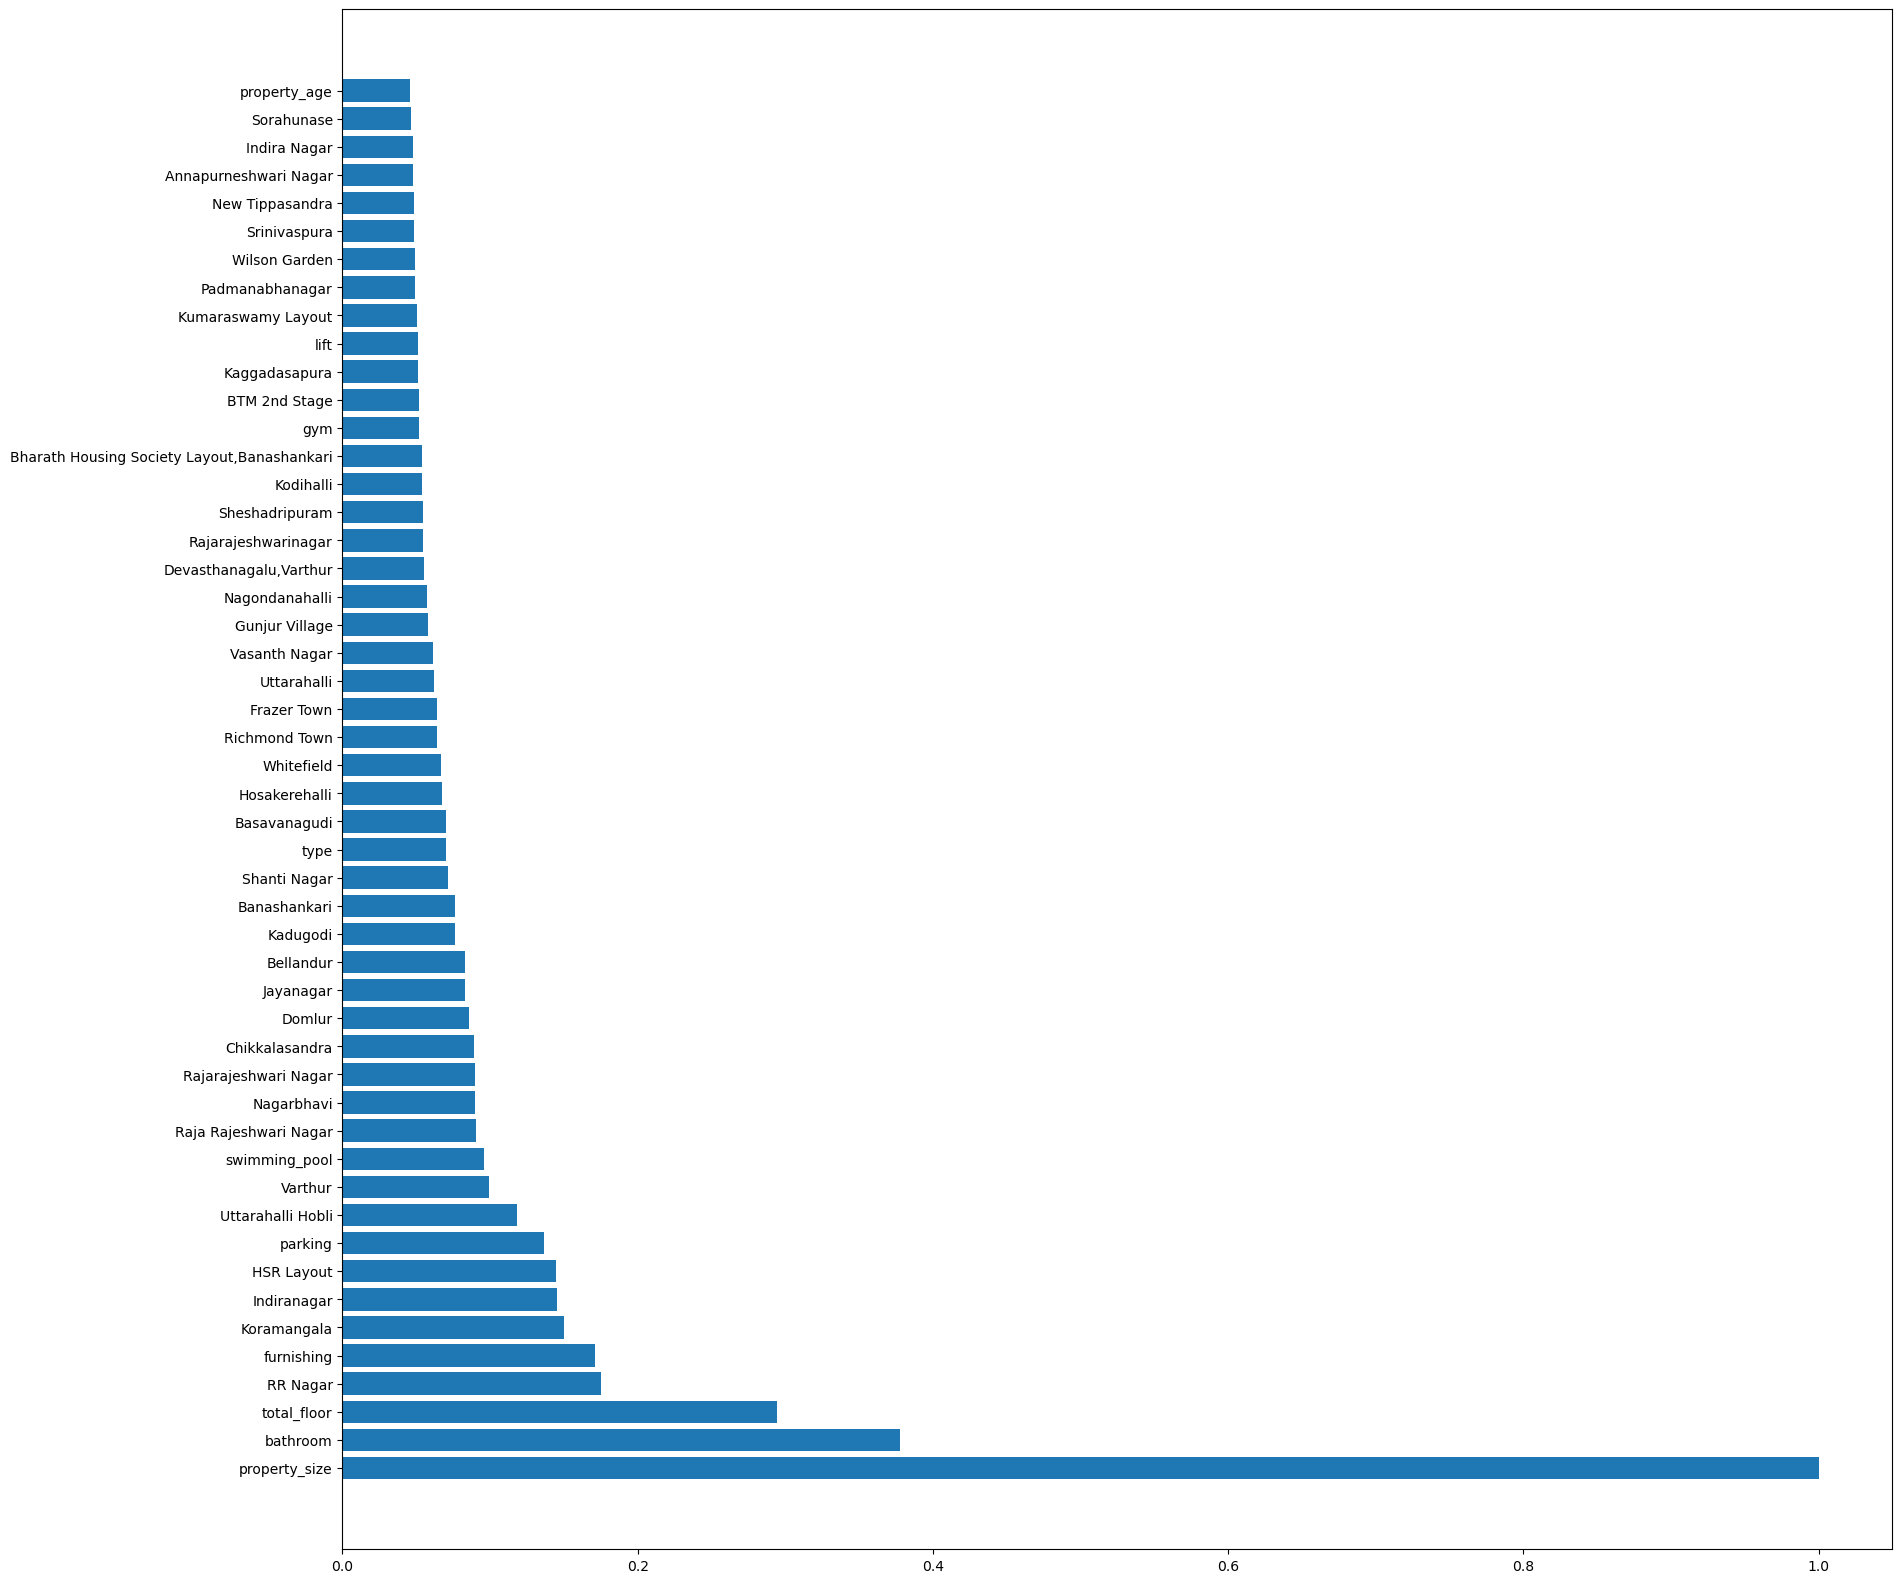

In [95]:
plt.figure(figsize=(20,20))
plt.barh(features1.index,features1.imortance_normalized)

# Metric Evaluation

In [96]:
x_pred=model.predict(X_train)
print("Train_MSE: ",metrics.mean_squared_error(y_train,x_pred))
print("Train_MAE: ",metrics.mean_absolute_error(y_train,x_pred))
print("Train_R2_Score: ",metrics.r2_score(y_train,x_pred))


Train_MSE:  15760242.19091453
Train_MAE:  2938.955752958975
Train_R2_Score:  0.7623939021987337


In [97]:
y_pred=model.predict(X_test)
print("Test_MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("Test_MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("Test_R2_Score: ",metrics.r2_score(y_test,y_pred))


Test_MSE:  16635968.074181397
Test_MAE:  2997.1771240585836
Test_R2_Score:  0.7456945938681694


In [98]:
out=pd.DataFrame({'Price_actual':y_train,'Price_pred':x_pred})
result=df1.merge(out,left_index=True,right_index=True)
result

,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,rent,Price_actual,Price_pred
2,2,other,2018,2,0,1,0,0,1,3,1350.0,6.0,3.0,1.0,5.0,2,2,3.0,28000.0,28000.0,25610.078408
3,0,Attiguppe,2018,2,0,0,0,1,1,1,600.0,3.0,1.0,1.0,2.0,0,1,0.0,8000.0,8000.0,9811.509129
5,0,"Seetharampalya,Hoodi",2017,2,1,1,1,1,1,3,1080.0,0.0,2.0,3.0,5.0,2,2,2.0,18000.0,18000.0,22312.608170
6,2,"Narayanappa Garden,Whitefield",2018,0,1,1,1,1,2,3,1895.0,5.0,3.0,3.0,9.0,0,2,3.0,32000.0,32000.0,33668.230146
8,1,Banashankari,2018,0,0,0,0,0,1,0,900.0,10.0,2.0,0.0,1.0,0,1,0.0,10000.0,10000.0,13377.399719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20491,0,Kaggadasapura,2017,0,0,1,0,1,1,3,600.0,6.0,1.0,5.0,5.0,2,2,1.0,10000.0,10000.0,11720.767070
20492,0,Ulsoor,2017,0,0,1,0,1,1,1,850.0,30.0,2.0,1.0,4.0,2,2,1.0,20000.0,20000.0,18922.876638
20496,1,Koramangala 4th Block,2017,0,0,0,0,1,1,3,1000.0,10.0,2.0,1.0,2.0,0,1,2.0,30000.0,30000.0,22479.856201
20497,1,Kumaraswamy Layout,2017,2,1,1,0,1,1,3,1000.0,0.0,2.0,5.0,5.0,1,2,2.0,16000.0,16000.0,18205.430222


In [99]:
result[['type','locality','property_size','bathroom','parking','Price_actual','Price_pred']].sample(20)

,type,locality,property_size,bathroom,parking,Price_actual,Price_pred
11321,1,"Silver Springs Layout,Munnekollal",1152.0,2.0,3,21000.0,19963.263749
19084,2,Whitefield,1500.0,3.0,1,15000.0,21078.848937
4165,1,Panathur,600.0,1.0,1,12500.0,12242.359213
3748,1,Kasavanahalli,1310.0,2.0,3,33000.0,27653.756846
17112,1,Basavanagudi,1200.0,2.0,1,18000.0,21139.351330
13842,1,"Narayanappa Garden,Whitefield",1400.0,2.0,3,20000.0,21995.929508
8401,1,Kumaraswamy Layout,1200.0,2.0,1,15000.0,16408.003995
6275,1,Doddanekkundi,900.0,1.0,3,13000.0,12798.855315
15811,1,Koramangala 8th Block,600.0,1.0,0,14000.0,12663.561962
16740,0,BTM Layout 1,500.0,1.0,1,13000.0,10723.781980


In [100]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result1=df1.merge(out,left_index=True,right_index=True)
result1

,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,floor,total_floor,water_supply,building_type,balconies,rent,Price_actual,Price_pred
1,1,Bellandur,2017,0,0,1,0,1,1,3,1400.0,4.0,2.0,3.0,4.0,0,2,2.0,22000.0,22000.0,25523.682287
4,2,Kodihalli,2018,2,0,0,0,1,1,3,1500.0,15.0,3.0,0.0,0.0,0,1,1.0,41250.0,41250.0,28317.100979
7,1,HSR Layout 5th Sector,2018,0,0,0,0,1,1,3,1000.0,10.0,2.0,0.0,2.0,2,1,0.0,22000.0,22000.0,21119.563434
18,1,Chikkakannalli,2017,2,0,0,0,0,1,3,1020.0,0.0,2.0,4.0,15.0,0,2,2.0,22000.0,22000.0,21540.707934
20,1,Doddanekkundi,2017,2,1,1,0,1,1,2,1285.0,3.0,2.0,0.0,5.0,1,2,0.0,27000.0,27000.0,22362.398565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20468,0,Wilson Garden,2018,2,0,1,0,1,1,2,550.0,1.0,1.0,3.0,5.0,1,0,1.0,15000.0,15000.0,15216.383083
20471,0,other,2018,0,0,0,0,1,1,0,450.0,3.0,1.0,0.0,2.0,0,1,0.0,8500.0,8500.0,8875.411220
20482,1,Raja Rajeshwari Nagar,2017,2,0,0,0,1,1,3,1200.0,13.0,2.0,1.0,2.0,2,0,0.0,15000.0,15000.0,14111.478163
20483,1,Mahadevapura,2018,0,0,0,0,1,1,3,1300.0,5.0,2.0,1.0,3.0,0,2,3.0,20000.0,20000.0,21537.524289


In [101]:
result1[['type','locality','property_size','bathroom','parking','Price_actual','Price_pred']].sample(20)

,type,locality,property_size,bathroom,parking,Price_actual,Price_pred
16248,1,Kadugodi,760.0,2.0,3,15000.0,11826.289690
426,1,Ittamadu,1000.0,2.0,1,14000.0,13125.332030
16181,2,Bellandur,2145.0,3.0,3,41250.0,39146.780689
6457,0,other,340.0,1.0,0,13000.0,8428.901820
12214,1,other,1050.0,2.0,3,11000.0,19814.166230
6007,1,other,1185.0,2.0,3,23000.0,24058.290487
4555,1,Domlur,1000.0,2.0,1,22000.0,21909.090258
15285,2,Kaggadasapura,1695.0,2.0,3,26500.0,25104.824482
11207,1,Bommanahalli,1250.0,2.0,3,19000.0,19565.862287
2242,0,JP Nagar,650.0,1.0,1,9500.0,11254.013929


In [194]:
def predict_rent(locality,type,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,
       property_age,bathroom,floor,total_floor,water_supply,building_type,balconies):
    x=np.zeros(len(X.columns))
    loc_index=np.where(X.columns==locality)[0][0]
    if loc_index>=0:
        x[loc_index]=1
    x[0]=type
    x[1]=activation_date
    x[2]=lease_type
    x[3]=gym
    x[4]=lift
    x[5]=swimming_pool
    x[6]=negotiable
    x[7]=furnishing
    x[8]=parking
    x[9]=property_size
    x[10]=property_age
    x[11]=bathroom
    x[12]=floor
    x[13]=total_floor
    x[14]=water_supply
    x[15]=building_type
    x[16]=balconies
    return x
    


# Save the model

In [105]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\Rent_Prediction\model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model and predict the result

In [196]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\Rent_Prediction\model.pkl', 'rb') as file:
    plr= pickle.load(file)

In [197]:
x=predict_rent('Bellandur',1,2017,0,0,1,0,1,1,3,1400.0,4.0,2.0,3.0,4.0,0,2,2.0)
x=sc.fit_transform([x])[0]
result=plr.predict([x])[0]
print(result)

18959.412954963664


# Actual Rent is Rs.22000 and Model predict the Rent is approximately Rs.19000